### Predict housing price

### Data Understanding and cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read data from the dataset
housing_data = pd.read_csv("train.csv")

In [3]:
# Scan through the first 5 records to understand
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# Get the datatypes and missing values for the columsn
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Get the mean, std deviation, ICR values and check for outliers for numerical data
housing_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
# Removing columns which have very large null values
housing_data = housing_data.replace({'':np.nan})
housing_data = housing_data.dropna(thresh=0.8*len(housing_data), axis=1)

In [7]:
# Get total number of records
housing_data.shape

(1460, 76)

In [8]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
# Understand the spread of the data and how the data is categoried for columns
housing_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 76, dtype: int64

In [10]:
# Drop duplicates if any
housing_data.drop_duplicates()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
..

In [11]:
# Drop columns which has unique value in all the rows
housing_data.drop('Id',axis=1,inplace=True)

In [12]:
# Get all the columns from the dataset
housing_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [13]:
# For the categorical column 'MSSubClass' get the different categorical values
housing_data.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [14]:
# Convert categorical variable 'MSSubClass' to category type
housing_data.MSSubClass.astype('category')

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: category
Categories (15, int64): [20, 30, 40, 45, ..., 120, 160, 180, 190]

In [15]:
# Convert MSSubClass situation to string data
def MSSubClass_map(x):
    y = str(x)
    if y == '20':
        return '1-STORY 1946 & NEWER ALL STYLES'
    elif y == '60':
        return '2-STORY 1946 & NEWER'
    elif y == '50':
        return '1-1/2 STORY FINISHED ALL AGES'
    elif y == '120':
        return '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
    elif y == '30':
        return '1-STORY 1945 & OLDER'
    elif y == '160':
        return '2-STORY PUD - 1946 & NEWER'
    elif y == '70':
        return '2-STORY 1945 & OLDER'
    elif y == '80':
        return 'SPLIT OR MULTI-LEVEL'
    elif y == '90':
        return 'DUPLEX - ALL STYLES AND AGES'
    else:
        return 'OTHERS'

In [16]:
housing_data['MSSubClass'] =  housing_data['MSSubClass'].apply(MSSubClass_map)

In [17]:
housing_data.MSSubClass.value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
OTHERS                                                    92
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
Name: MSSubClass, dtype: int64

In [18]:
# For the categorical column 'MSZoning' get the different categorical values
housing_data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [19]:
# Drop MSZoning as the data is heavily biased on 'RL' and will not contribute much to our analysis
housing_data.drop('MSZoning',axis=1,inplace=True)

In [20]:
# For the categorical column 'Street' get the different categorical values
housing_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [21]:
# Drop Street as the data is heavily biased on 'Pave' and will not contribute much to our analysis
housing_data.drop('Street',axis=1,inplace=True)

In [22]:
# For the categorical column 'LotShape' get the different categorical values
housing_data.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [23]:
# Drop LotShape as the data is  biased on 'Reg' and will not contribute much to our analysis
housing_data.drop('LotShape',axis=1,inplace=True)

In [24]:
# For the categorical column 'OverallQual' get the different categorical values
housing_data.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [25]:
# Convert Overallqual to string data and map it the respective value
def Overallqual_map(x):
    y = str(x)
    if y == '10':
        return 'Very Excellent'
    elif y == '9':
        return 'Excellent'
    elif y == '8':
        return 'Very Good'
    elif y == '7':
        return 'Good'
    elif y == '6':
        return 'Above Average'
    elif y == '5':
        return 'Average'
    elif y == '4':
        return 'Below Average'
    elif y == '3':
        return 'Fair'
    elif y == '2':
        return 'Poor'
    elif y == '1':
        return 'Very Poor'

In [26]:
housing_data['OverallQual'] =  housing_data['OverallQual'].apply(Overallqual_map)

In [27]:
housing_data.OverallQual.value_counts()

Average           397
Above Average     374
Good              319
Very Good         168
Below Average     116
Excellent          43
Fair               20
Very Excellent     18
Poor                3
Very Poor           2
Name: OverallQual, dtype: int64

In [28]:
# Convert categorical variable 'OverallQual' to category type
housing_data.OverallQual.astype('category')

0                Good
1       Above Average
2                Good
3                Good
4           Very Good
            ...      
1455    Above Average
1456    Above Average
1457             Good
1458          Average
1459          Average
Name: OverallQual, Length: 1460, dtype: category
Categories (10, object): ['Above Average', 'Average', 'Below Average', 'Excellent', ..., 'Poor', 'Very Excellent', 'Very Good', 'Very Poor']

In [29]:
# Convert Overallcond to string data and map it to its respective value
def Overallcond_map(x):
    y = str(x)
    if y == '10':
        return 'Very Excellent'
    elif y == '9':
        return 'Excellent'
    elif y == '8':
        return 'Very Good'
    elif y == '7':
        return 'Good'
    elif y == '6':
        return 'Above Average'
    elif y == '5':
        return 'Average'
    elif y == '4':
        return 'Below Average'
    elif y == '3':
        return 'Fair'
    elif y == '2':
        return 'Poor'
    elif y == '1':
        return 'Very Poor'

In [30]:
housing_data['OverallCond'] =  housing_data['OverallCond'].apply(Overallqual_map)

In [31]:
housing_data.OverallCond.value_counts()

Average          821
Above Average    252
Good             205
Very Good         72
Below Average     57
Fair              25
Excellent         22
Poor               5
Very Poor          1
Name: OverallCond, dtype: int64

In [32]:
# Convert categorical variable 'OverallCond' to category type
housing_data.OverallCond.astype('category')

0             Average
1           Very Good
2             Average
3             Average
4             Average
            ...      
1455          Average
1456    Above Average
1457        Excellent
1458    Above Average
1459    Above Average
Name: OverallCond, Length: 1460, dtype: category
Categories (9, object): ['Above Average', 'Average', 'Below Average', 'Excellent', ..., 'Good', 'Poor', 'Very Good', 'Very Poor']

In [33]:
# For the categorical column 'LandContour' get the different categorical values
housing_data.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [34]:
# Drop LandContour as the data is  biased on 'Lvl' and will not help much in analysis
housing_data.drop('LandContour',axis=1,inplace=True)

In [35]:
# For the categorical column 'LandSlope' get the different categorical values
housing_data.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [36]:
# Drop LandSlope as the data is  biased on 'Gtl' and will not help much in analysis
housing_data.drop('LandSlope',axis=1,inplace=True)

In [37]:
# For the categorical column 'Utilities' get the different categorical values
housing_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [38]:
# Drop Utilities as the data is  biased on 'AllPub' and will not help much in analysis
housing_data.drop('Utilities',axis=1,inplace=True)

In [39]:
# For the categorical column 'LotConfig' get the different categorical values
housing_data.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [40]:
# Drop LotConfig as the data is  biased on 'Inside'  and will not help much in analysis
housing_data.drop('LotConfig',axis=1,inplace=True)

In [41]:
# For the categorical column 'Neighborhood' get the different categorical values
housing_data.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [42]:
# Convert categorical variable 'Neighborhood' to category type
housing_data.Neighborhood.astype('category')

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: category
Categories (25, object): ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', ..., 'Somerst', 'StoneBr', 'Timber', 'Veenker']

In [43]:
# For the categorical column 'Condition1' get the different categorical values
housing_data.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [44]:
# Drop Condition1 as the data is  biased on 'Norm' and will not help much in analysis
housing_data.drop('Condition1',axis=1,inplace=True)

In [45]:
# For the categorical column 'Condition2' get the different categorical values
housing_data.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [46]:
# Drop Condition2 as the data is  biased on 'Norm' and will not help much in analysis
housing_data.drop('Condition2',axis=1,inplace=True)

In [47]:
# For the categorical column 'BldgType' get the different categorical values
housing_data.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [48]:
# Drop BldgType as the data is  biased on '1Fam' and will not help much in analysis
housing_data.drop('BldgType',axis=1,inplace=True)

In [49]:
# For the categorical column 'HouseStyle' get the different categorical values
housing_data.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [50]:
# Convert categorical variable 'HouseStyle' to category type
housing_data.HouseStyle.astype('category')

0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
         ...  
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: category
Categories (8, object): ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']

In [51]:
# For the categorical column 'RoofStyle' get the different categorical values
housing_data.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [52]:
# Drop RoofStyle as the data is  biased on '1Fam' and will not help much in analysis
housing_data.drop('RoofStyle',axis=1,inplace=True)

In [53]:
# For the categorical column 'RoofMatl' get the different categorical values
housing_data.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [54]:
# Drop RoofMatl as the data is  biased on 'CompShg' and will not help much in analysis
housing_data.drop('RoofMatl',axis=1,inplace=True)

In [55]:
# For the categorical column 'Exterior1st' get the different categorical values
housing_data.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [56]:
# Convert categorical variable 'Exterior1st' to category type
housing_data.Exterior1st.astype('category')

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Sdng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CemntBd
1458    MetalSd
1459    HdBoard
Name: Exterior1st, Length: 1460, dtype: category
Categories (15, object): ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', ..., 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']

In [57]:
# For the categorical column 'Exterior2nd' get the different categorical values
housing_data.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [58]:
# Convert categorical variable 'Exterior2nd' to category type
housing_data.Exterior2nd.astype('category')

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Shng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CmentBd
1458    MetalSd
1459    HdBoard
Name: Exterior2nd, Length: 1460, dtype: category
Categories (16, object): ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', ..., 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng']

In [59]:
# For the categorical column 'MasVnrType' get the different categorical values
housing_data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [60]:
# Convert categorical variable 'Exterior2nd' to category type
housing_data.MasVnrType.astype('category')

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: category
Categories (4, object): ['BrkCmn', 'BrkFace', 'None', 'Stone']

In [61]:
# Replace None with nan as this is not a category
housing_data.MasVnrType.replace(to_replace='None', value=np.nan, inplace=True)

In [62]:
housing_data.MasVnrType.value_counts()

BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [63]:
# Drop this column as it has 50% missing values and the majority is BrkFace
housing_data.drop('MasVnrType',axis=1,inplace=True)

In [64]:
# For the categorical column 'ExterQual' get the different categorical values
housing_data.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [65]:
# Convert categorical variable 'ExterQual' to category type
housing_data.ExterQual.astype('category')

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: category
Categories (4, object): ['Ex', 'Fa', 'Gd', 'TA']

In [66]:
# For the categorical column 'ExterCond' get the different categorical values
housing_data.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [67]:
# Drop this column as it has biased data on TA and will not help in analysis
housing_data.drop('ExterCond',axis=1,inplace=True)

In [68]:
# For the categorical column 'Foundation' get the different categorical values
housing_data.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [69]:
# Convert categorical variable 'Foundation' to category type
housing_data.Foundation.astype('category')

0        PConc
1       CBlock
2        PConc
3       BrkTil
4        PConc
         ...  
1455     PConc
1456    CBlock
1457     Stone
1458    CBlock
1459    CBlock
Name: Foundation, Length: 1460, dtype: category
Categories (6, object): ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood']

In [70]:
# For the categorical column 'BsmtQual' get the different categorical values
housing_data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [71]:
# Convert categorical variable 'BsmtQual' to category type
housing_data.BsmtQual.astype('category')

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: category
Categories (4, object): ['Ex', 'Fa', 'Gd', 'TA']

In [72]:
# Impute missing values with no basement
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('No Basement')

In [73]:
# For the categorical column 'BsmtCond' get the different categorical values
housing_data.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [74]:
# Drop this column as it has biased data and will not help in analysis
housing_data.drop('BsmtCond',axis=1,inplace=True)

In [75]:
# For the categorical column 'BsmtExposure' get the different categorical values
housing_data.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [76]:
# Convert categorical variable 'BsmtExposure' to category type
housing_data.BsmtExposure.astype('category')

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1460, dtype: category
Categories (4, object): ['Av', 'Gd', 'Mn', 'No']

In [77]:
# Impute missing values with no basement
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('No Basement')

In [78]:
housing_data.BsmtExposure.value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [79]:
# For the categorical column 'BsmtFinType1' get the different categorical values
housing_data.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [80]:
# Convert categorical variable 'BsmtFinType1' to category type
housing_data.BsmtFinType1.astype('category')

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1460, dtype: category
Categories (6, object): ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf']

In [81]:
# Impute missing values with no basement
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('No Basement')

In [82]:
# For the categorical column 'BsmtFinType2' get the different categorical values
housing_data.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [83]:
# Drop this column as it has biased data on Unf and will not help in analysis
housing_data.drop('BsmtFinType2',axis=1,inplace=True)

In [84]:
# For the categorical column 'Heating' get the different categorical values
housing_data.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [85]:
# Drop this column as it has biased data on GasA and will not help in analysis
housing_data.drop('Heating',axis=1,inplace=True)

In [86]:
# For the categorical column 'HeatingQC' get the different categorical values
housing_data.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [87]:
# Convert categorical variable 'HeatingQC' to category type
housing_data.HeatingQC.astype('category')

0       Ex
1       Ex
2       Ex
3       Gd
4       Ex
        ..
1455    Ex
1456    TA
1457    Ex
1458    Gd
1459    Gd
Name: HeatingQC, Length: 1460, dtype: category
Categories (5, object): ['Ex', 'Fa', 'Gd', 'Po', 'TA']

In [88]:
# For the categorical column 'CentralAir' get the different categorical values
housing_data.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [89]:
# Drop this column as it has biased data on Y and will not help in analysis
housing_data.drop('CentralAir',axis=1,inplace=True)

In [90]:
# For the categorical column 'Electrical' get the different categorical values
housing_data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [91]:
# Drop this column as it has biased data on SBrkr and will not help in analysis
housing_data.drop('Electrical',axis=1,inplace=True)

In [92]:
# For the categorical column 'KitchenQual' get the different categorical values
housing_data.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [93]:
# Convert categorical variable 'KitchenQual' to category type
housing_data.KitchenQual.astype('category')

0       Gd
1       TA
2       Gd
3       Gd
4       Gd
        ..
1455    TA
1456    TA
1457    Gd
1458    Gd
1459    TA
Name: KitchenQual, Length: 1460, dtype: category
Categories (4, object): ['Ex', 'Fa', 'Gd', 'TA']

In [94]:
# For the categorical column 'Functional' get the different categorical values
housing_data.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [95]:
# Drop this column as it has biased data and will not help in analysis
housing_data.drop('Functional',axis=1,inplace=True)

In [96]:
# For the categorical column 'GarageType' get the different categorical values
housing_data.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [97]:
# Convert categorical variable 'GarageType' to category type
housing_data.GarageType.astype('category')

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: category
Categories (6, object): ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd']

In [98]:
# Impute missing value with 'No Garage'
housing_data['GarageType'] = housing_data['GarageType'].fillna('No Garage')

In [99]:
housing_data.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [100]:
# For the categorical column 'GarageFinish' get the different categorical values
housing_data.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [101]:
# Convert categorical variable 'GarageFinish' to category type
housing_data.GarageFinish.astype('category')

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: category
Categories (3, object): ['Fin', 'RFn', 'Unf']

In [102]:
# Impute missing value with 'No Garage'
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('No Garage')

In [103]:
housing_data.GarageFinish.value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [104]:
# For the categorical column 'GarageQual' get the different categorical values
housing_data.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [105]:
# Drop this column as it has biased data and will not help in analysis
housing_data.drop('GarageQual',axis=1,inplace=True)

In [106]:
# For the categorical column 'GarageCond' get the different categorical values
housing_data.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [107]:
# Drop this column as it has biased data and will not help in analysis
housing_data.drop('GarageCond',axis=1,inplace=True)

In [108]:
# For the categorical column 'PavedDrive' get the different categorical values
housing_data.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [109]:
# Drop this column as it has biased data and will not help in analysis
housing_data.drop('PavedDrive',axis=1,inplace=True)

In [110]:
# For the categorical column 'MoSold' get the different categorical values
housing_data.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [111]:
# Convert month situation to string data
def month_map(x):
    y = str(x)
    if y =='1':
        return 'Jan'
    elif y =='2':
        return 'Feb'
    elif y == '3':
        return 'Mar'
    elif y == '4':
        return 'Apr'
    elif y == '5':
        return 'May'
    elif y == '6':
        return 'Jun'
    elif y == '7':
        return 'Jul'
    elif y == '8':
        return 'Aug'
    elif y == '9':
        return 'Sep'
    elif y == '10':
        return 'Oct'
    elif y == '11':
        return 'Nov'
    elif y == '12':
        return 'Dec'

In [112]:
housing_data['MoSold'] = housing_data['MoSold'].apply(month_map)

In [113]:
housing_data.MoSold.value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

In [114]:
# convert to category as it is catgorical
housing_data.MoSold.astype('category')

0       Feb
1       May
2       Sep
3       Feb
4       Dec
       ... 
1455    Aug
1456    Feb
1457    May
1458    Apr
1459    Jun
Name: MoSold, Length: 1460, dtype: category
Categories (12, object): ['Apr', 'Aug', 'Dec', 'Feb', ..., 'May', 'Nov', 'Oct', 'Sep']

In [115]:
# For the categorical column 'SaleType' get the different categorical values
housing_data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [116]:
# Drop this column as it has biased data and will not help in analysis
housing_data.drop('SaleType',axis=1,inplace=True)

In [117]:
# For the categorical column 'SaleCondition' get the different categorical values
housing_data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [118]:
# Drop this column as it has biased data and will not help in analysis
housing_data.drop('SaleCondition',axis=1,inplace=True)

In [119]:
# Get total columns after dropping 
housing_data.shape

(1460, 50)

In [120]:
# Check for datatypes correctness and missing values
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Neighborhood   1460 non-null   object 
 4   HouseStyle     1460 non-null   object 
 5   OverallQual    1460 non-null   object 
 6   OverallCond    1460 non-null   object 
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   Exterior1st    1460 non-null   object 
 10  Exterior2nd    1460 non-null   object 
 11  MasVnrArea     1452 non-null   float64
 12  ExterQual      1460 non-null   object 
 13  Foundation     1460 non-null   object 
 14  BsmtQual       1460 non-null   object 
 15  BsmtExposure   1460 non-null   object 
 16  BsmtFinType1   1460 non-null   object 
 17  BsmtFinSF1     1460 non-null   int64  
 18  BsmtFinS

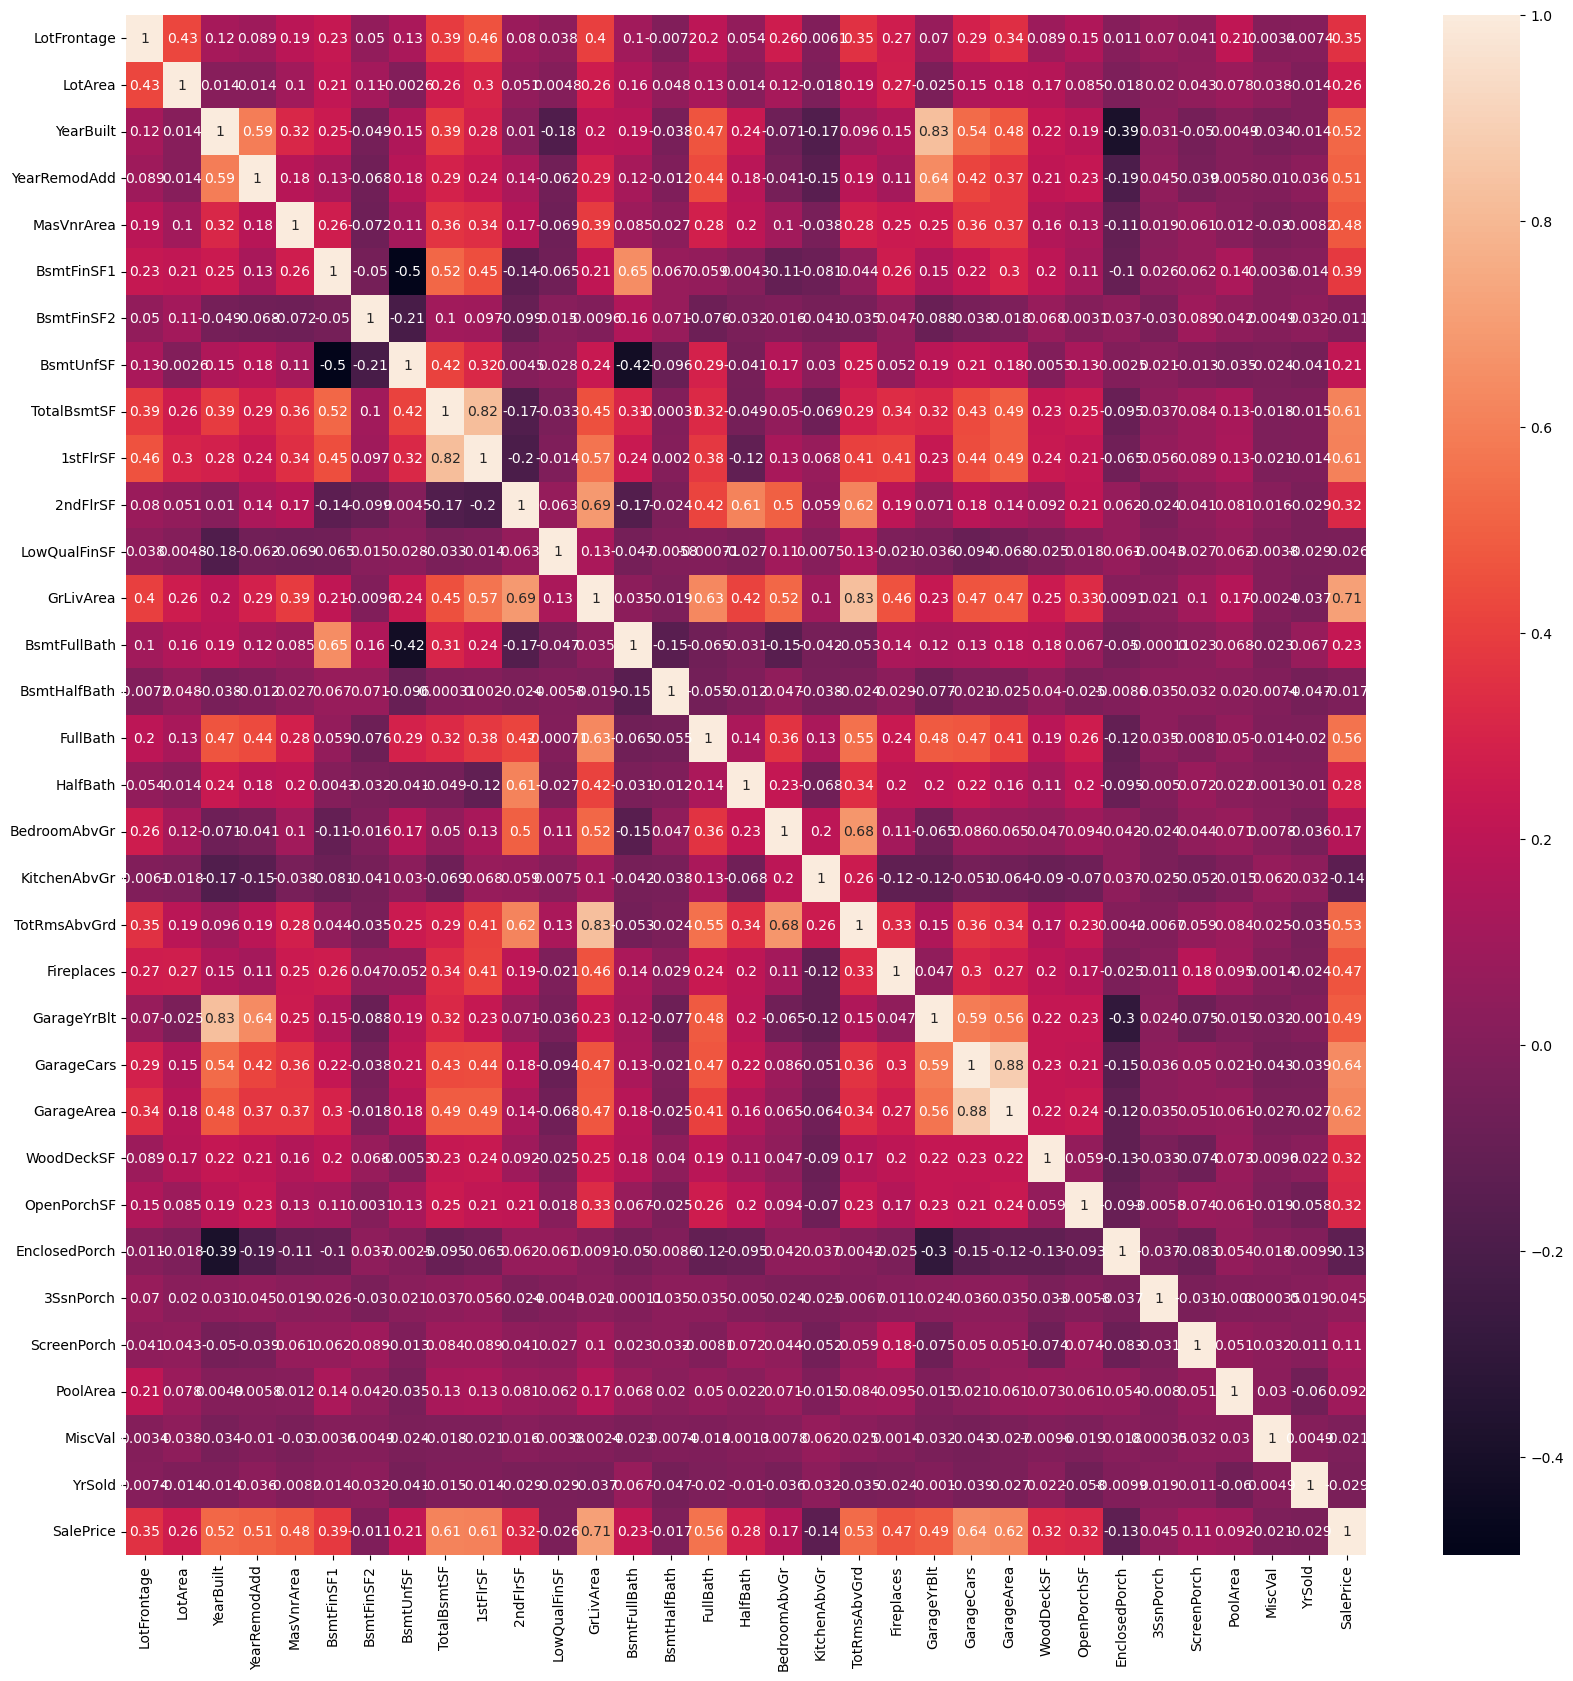

In [121]:
fig, ax = plt.subplots(figsize=(20, 20))
sbs.heatmap(housing_data.corr(),annot=True)
plt.show()

In [122]:
housing_data.describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1201.000000    1460.000000  1460.000000   1460.000000  1452.000000   
mean     70.049958   10516.828082  1971.267808   1984.865753   103.685262   
std      24.284752    9981.264932    30.202904     20.645407   181.066207   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      59.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      69.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      80.000000   11601.500000  2000.000000   2004.000000   166.000000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014  1978.506164     1.767123   472.980137    94.244521   
std       0.644666    24.689725     0.747315   213.804841   125.338794   
min       0.000000  1900.000000     0.000000     0.000000     0.000000   
25%       0.000000  1961.000000     1.000000   334.500000     0.000000   
50%       1.000000  1980.000000     2.000000   480.000000     0.000000   
75%       1.000000  2002.000000     2.000000   576.000000   168.000000   
max       3.000000  2010.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000

In [123]:
# Missing values for numeric values LotFrontage,MasVnrArea can be imputed with median as there are outliers
housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median())


In [124]:
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].median())

In [125]:
housing_data.head()

MSSubClass  LotFrontage  LotArea Neighborhood  \
0             2-STORY 1946 & NEWER         65.0     8450      CollgCr   
1  1-STORY 1946 & NEWER ALL STYLES         80.0     9600      Veenker   
2             2-STORY 1946 & NEWER         68.0    11250      CollgCr   
3             2-STORY 1945 & OLDER         60.0     9550      Crawfor   
4             2-STORY 1946 & NEWER         84.0    14260      NoRidge   

  HouseStyle    OverallQual OverallCond  YearBuilt  YearRemodAdd Exterior1st  \
0     2Story           Good     Average       2003          2003     VinylSd   
1     1Story  Above Average   Very Good       1976          1976     MetalSd   
2     2Story           Good     Average       2001          2002     VinylSd   
3     2Story           Good     Average       1915          1970     Wd Sdng   
4     2Story      Very Good     Average       2000          2000     VinylSd   

  Exterior2nd  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure  \
0     VinylSd       196.0        Gd      PConc       Gd           No   
1     MetalSd         0.0        TA     CBlock       Gd           Gd   
2     VinylSd       162.0        Gd      PConc       Gd           Mn   
3     Wd Shng         0.0        TA     BrkTil       TA           No   
4     VinylSd       350.0        Gd      PConc       Gd           Av   

  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0          GLQ         706           0        150          856        Ex   
1          ALQ         978           0        284         1262        Ex   
2          GLQ         486           0        434          920        Ex   
3          ALQ         216           0        540          756        Gd   
4          GLQ         655           0        490         1145        Ex   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1          Gd             8   
1         2         0             3             1          TA             6   
2         2         1             3             1          Gd             6   
3         1         0             3             1          Gd             7   
4         2         1             4             1          Gd             9   

   Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0           0     Attchd       2003.0          RFn           2         548   
1           1     Attchd       1976.0          RFn           2         460   
2           1     Attchd       2001.0          RFn           2         608   
3           1     Detchd       1998.0          Unf           3         642   
4           1     Attchd       2000.0          RFn           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal MoSold  YrSold  SalePrice  
0        0    Feb    2008     208500  
1        0    May    2007     181500  
2        0    Sep    2008     223500  
3        0    Feb    2006     140000  
4        0    Dec    2008     250000

In [126]:
# Get age of house
housing_data['Age'] = housing_data['YrSold'] - housing_data['YearBuilt']

In [127]:
# Get remodelled age
housing_data['RemodelAge'] = housing_data['YrSold'] - housing_data['YearRemodAdd']

In [128]:
# Impute Garage Age with mode
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(housing_data['GarageYrBlt'].mode()[0])

In [129]:
# Get Garage age
housing_data['GarageAge'] = housing_data['YrSold'] - housing_data['GarageYrBlt']

In [130]:
# Drop YrSold,YearRemodAdd,GarageYrBlt as we have derived variables
housing_data.drop(columns=['YrSold','GarageYrBlt','YearRemodAdd','YearBuilt','MoSold'],axis=1,inplace=True)

In [131]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Neighborhood   1460 non-null   object 
 4   HouseStyle     1460 non-null   object 
 5   OverallQual    1460 non-null   object 
 6   OverallCond    1460 non-null   object 
 7   Exterior1st    1460 non-null   object 
 8   Exterior2nd    1460 non-null   object 
 9   MasVnrArea     1460 non-null   float64
 10  ExterQual      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  BsmtQual       1460 non-null   object 
 13  BsmtExposure   1460 non-null   object 
 14  BsmtFinType1   1460 non-null   object 
 15  BsmtFinSF1     1460 non-null   int64  
 16  BsmtFinSF2     1460 non-null   int64  
 17  BsmtUnfSF      1460 non-null   int64  
 18  TotalBsm

### Data Visualization

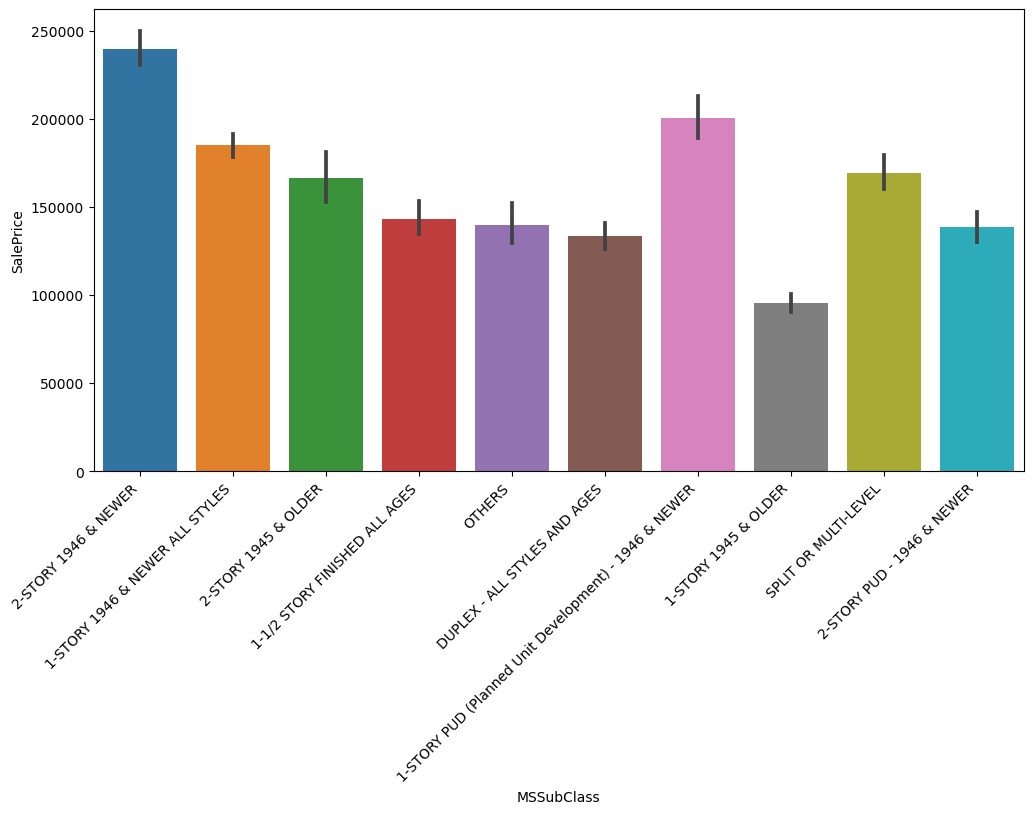

In [132]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='MSSubClass',y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

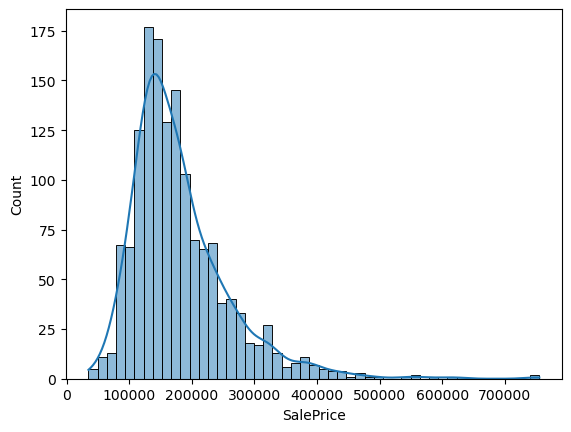

In [133]:
sbs.histplot(data=housing_data['SalePrice'],kde=True)

<Axes: xlabel='LotFrontage', ylabel='Count'>

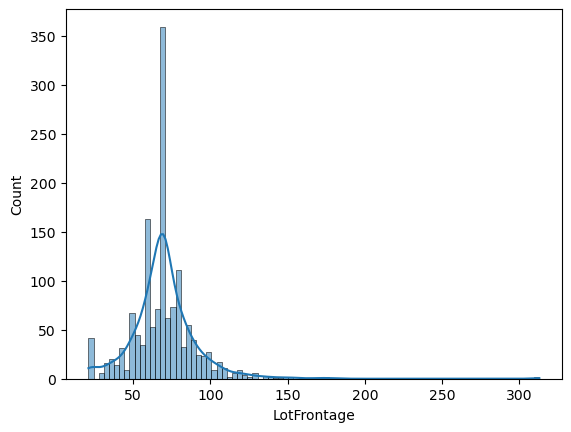

In [134]:
sbs.histplot(data=housing_data['LotFrontage'],kde=True)

<Axes: xlabel='GrLivArea', ylabel='Count'>

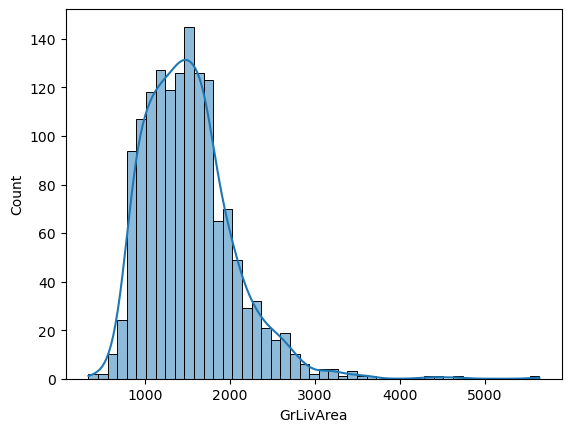

In [135]:
sbs.histplot(data=housing_data['GrLivArea'],kde=True)

<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

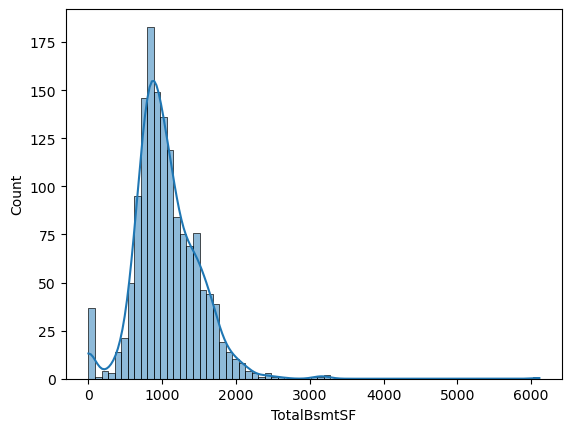

In [136]:
sbs.histplot(data=housing_data['TotalBsmtSF'],kde=True)

<Axes: xlabel='1stFlrSF', ylabel='Count'>

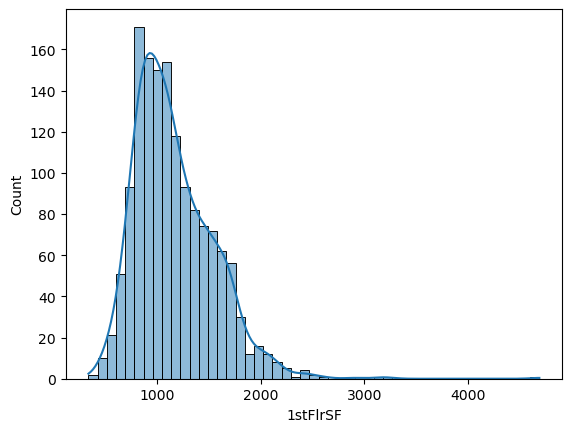

In [137]:
sbs.histplot(data=housing_data['1stFlrSF'],kde=True)

<Axes: xlabel='2ndFlrSF', ylabel='Count'>

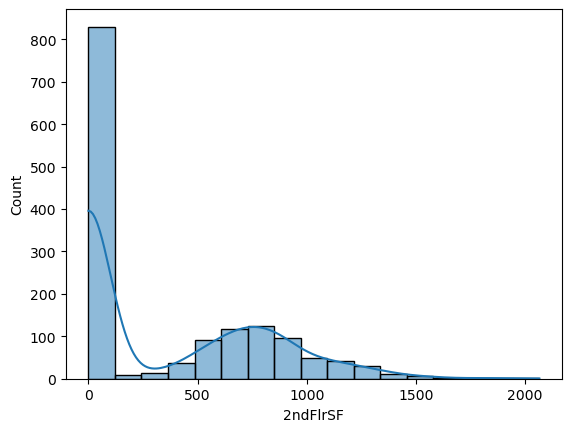

In [138]:
sbs.histplot(data=housing_data['2ndFlrSF'],kde=True)

<Axes: xlabel='MasVnrArea', ylabel='Count'>

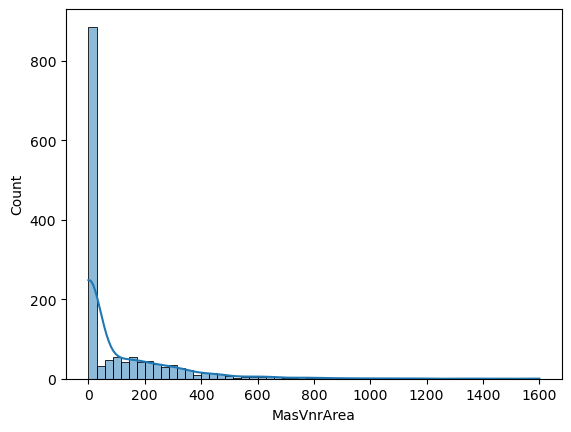

In [139]:
sbs.histplot(data=housing_data['MasVnrArea'],kde=True)

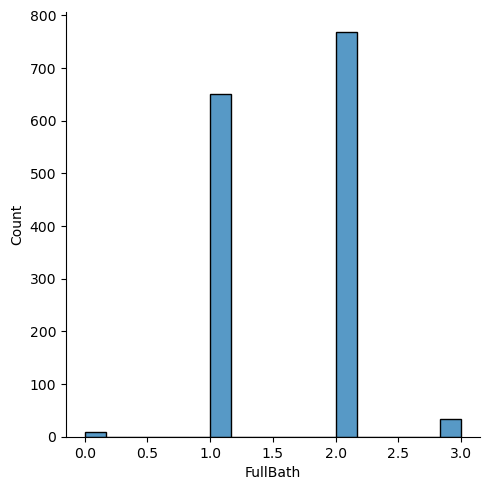

In [140]:
sbs.displot(housing_data['FullBath'],kind='hist')

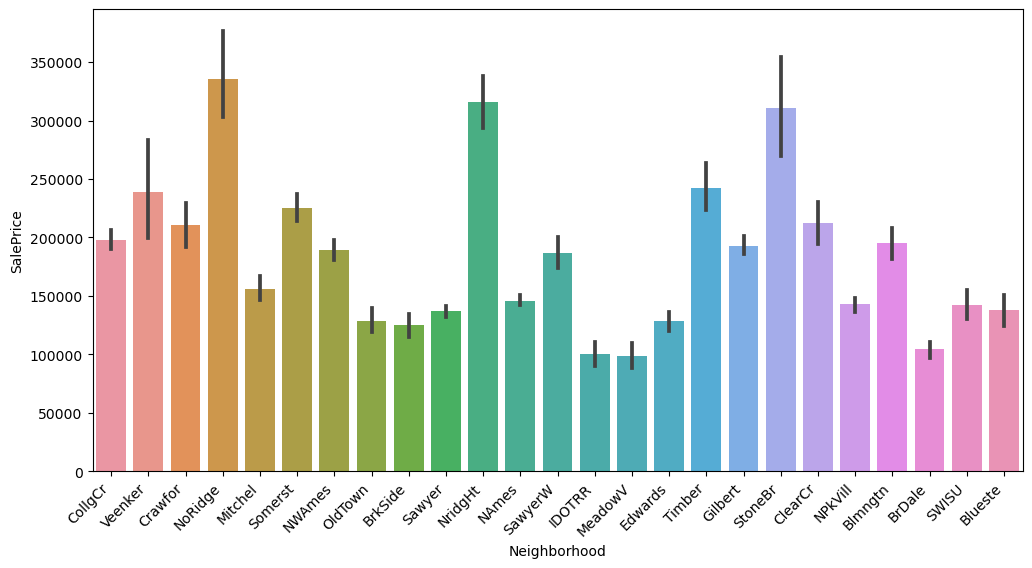

In [141]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='Neighborhood',y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Axes: xlabel='LotArea', ylabel='Count'>

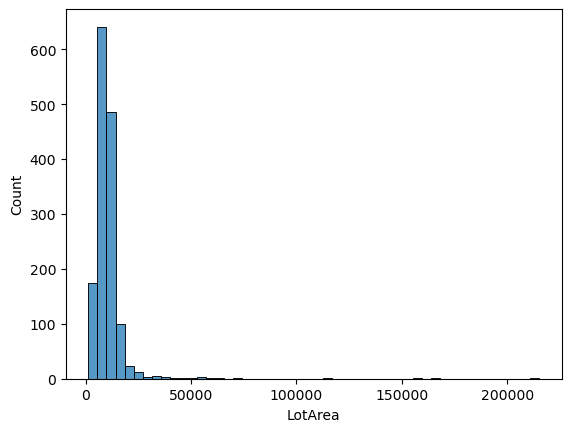

In [142]:
sbs.histplot(housing_data['LotArea'],bins=50)

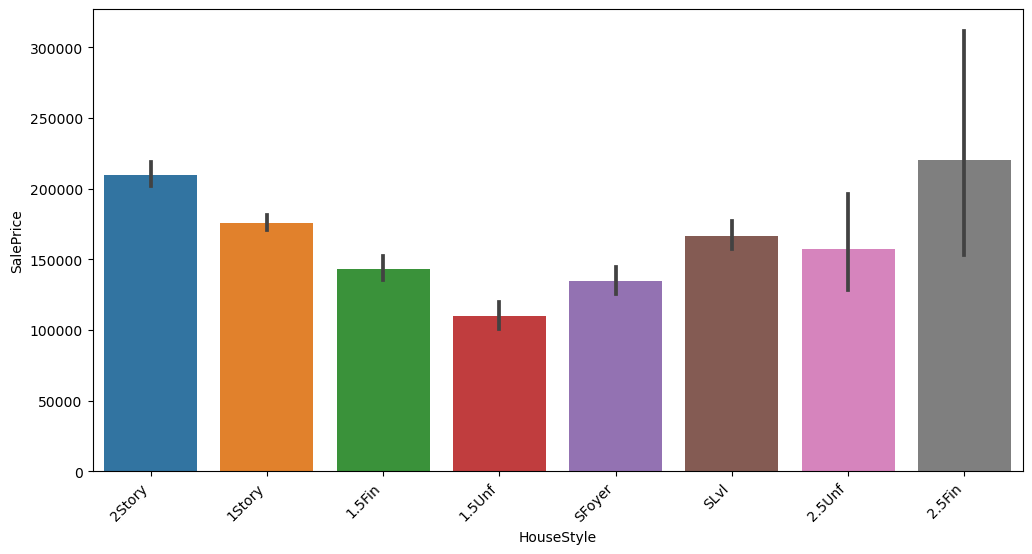

In [143]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='HouseStyle',y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

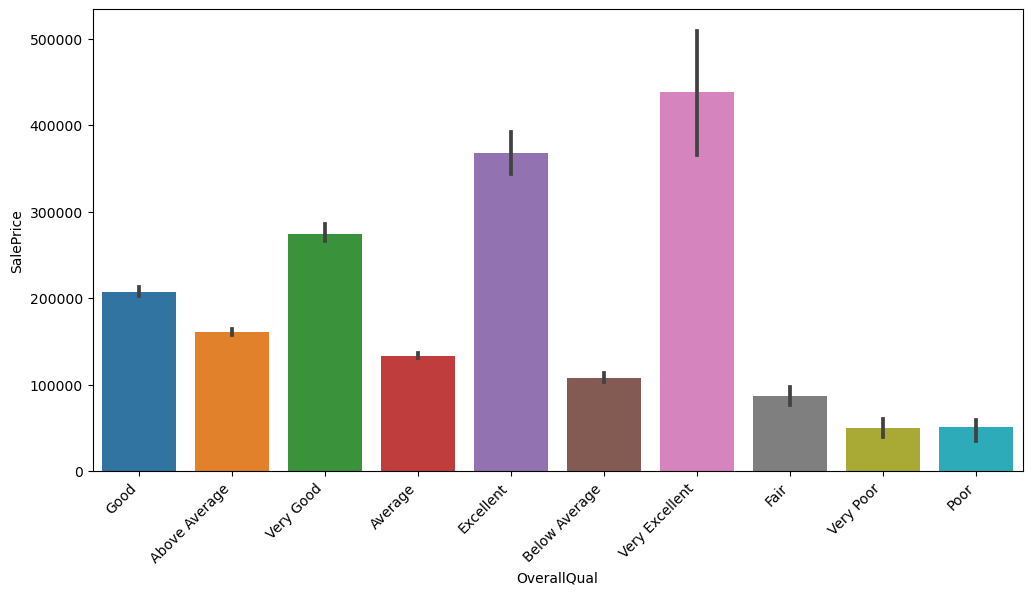

In [144]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='OverallQual',y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

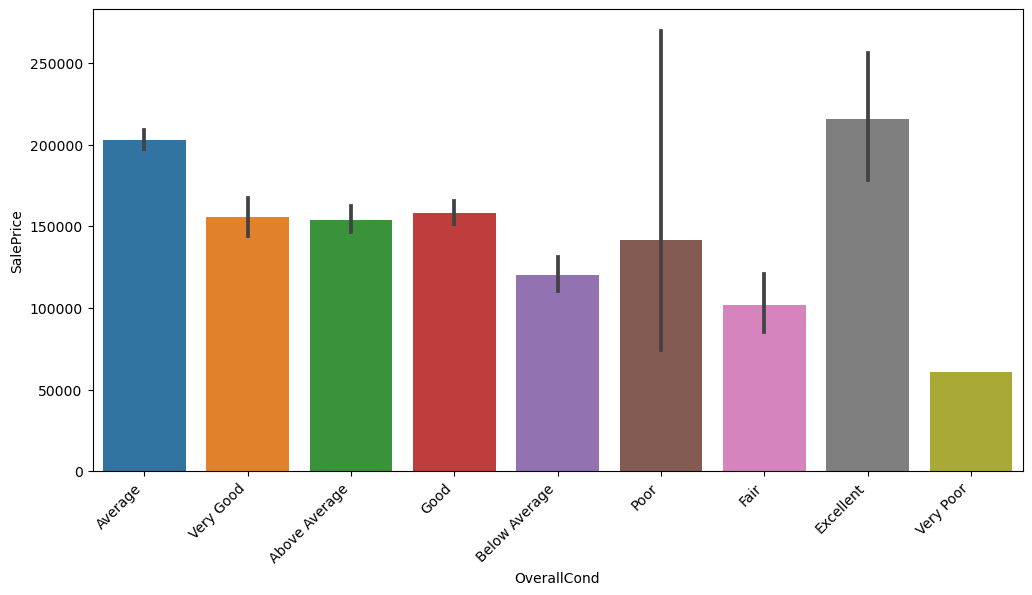

In [145]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='OverallCond',y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

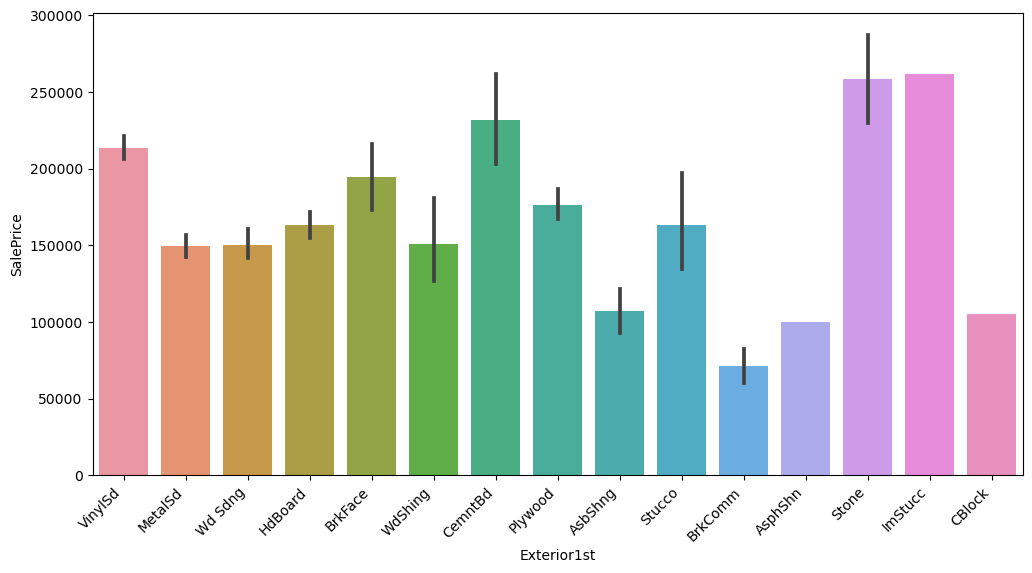

In [146]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='Exterior1st',y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

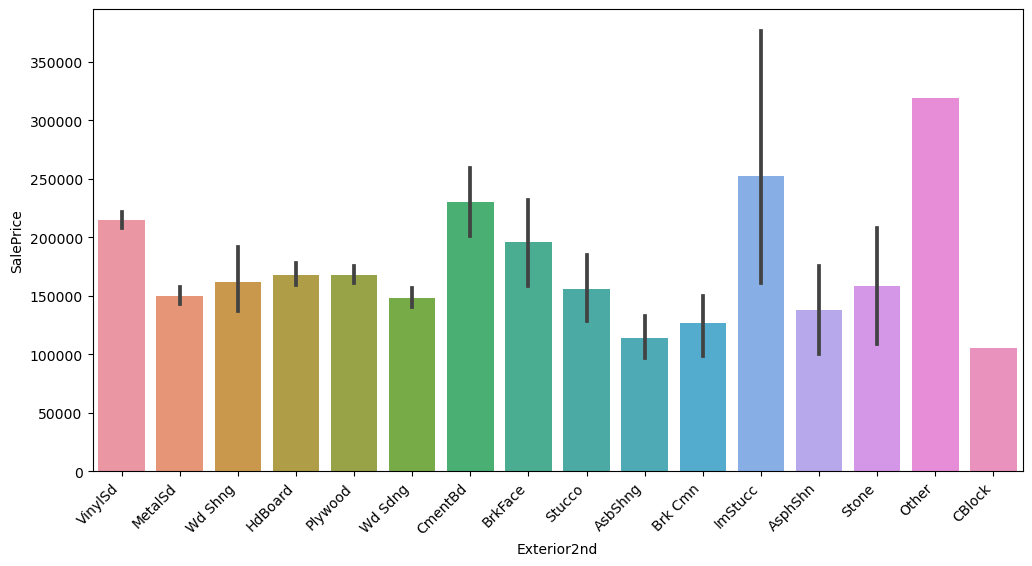

In [147]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='Exterior2nd',y='SalePrice',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

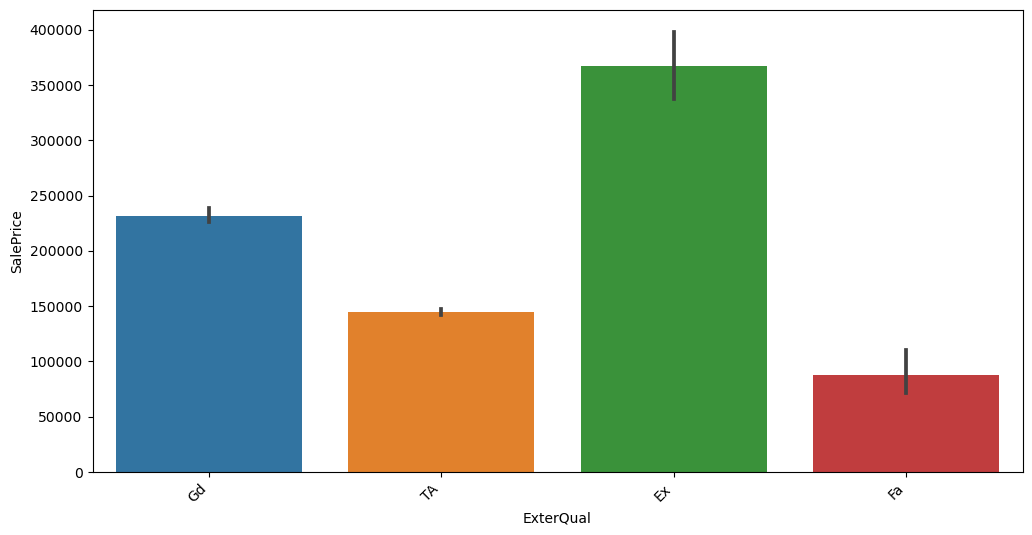

In [148]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='ExterQual',y='SalePrice',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

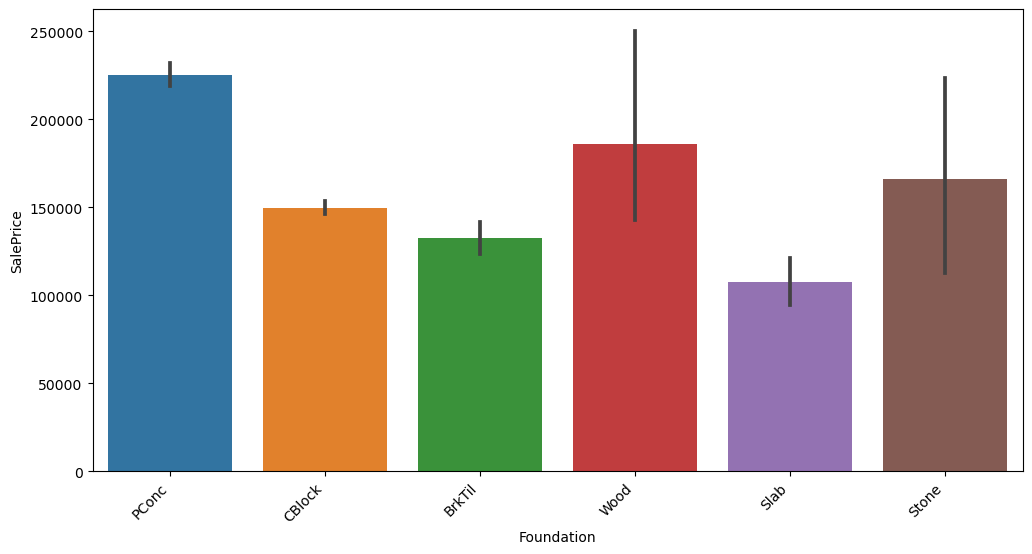

In [149]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='Foundation',y='SalePrice',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

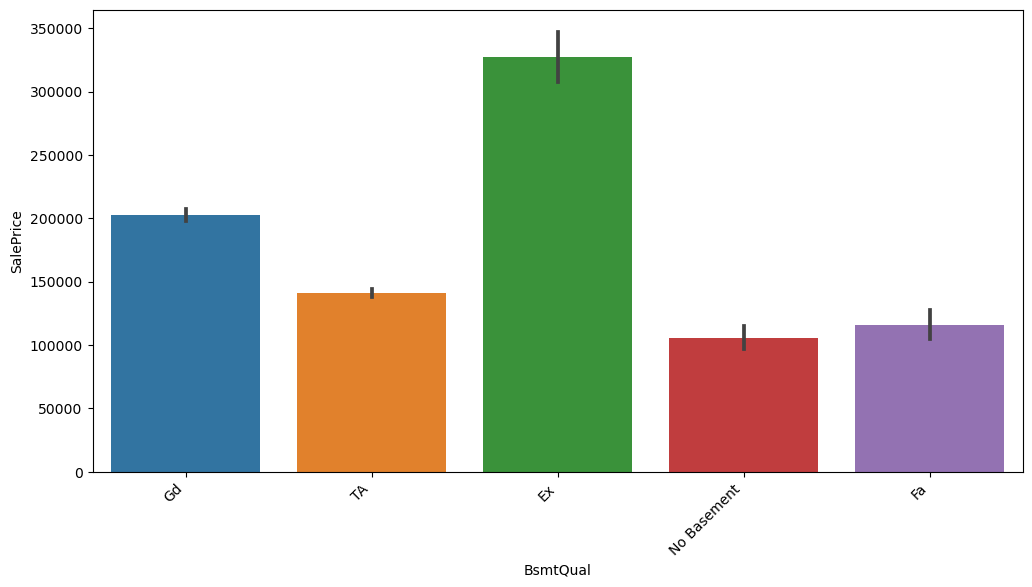

In [150]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='BsmtQual',y='SalePrice',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Axes: xlabel='TotRmsAbvGrd', ylabel='Count'>

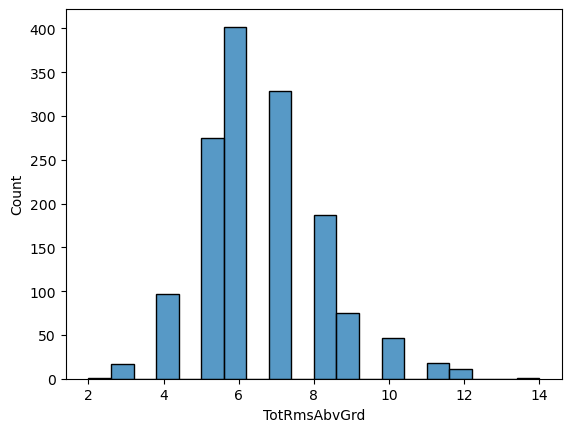

In [151]:
sbs.histplot(housing_data['TotRmsAbvGrd'],bins=20)

<Axes: xlabel='GarageCars', ylabel='Count'>

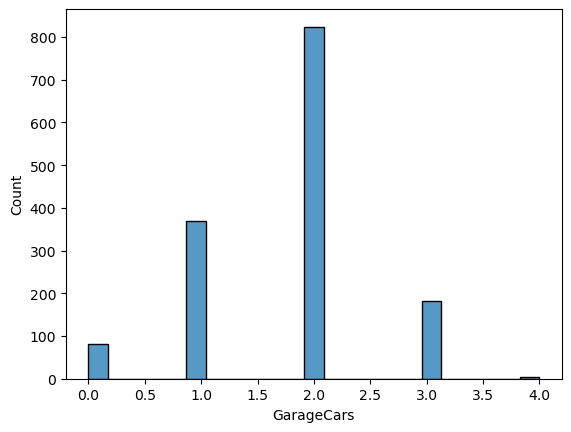

In [152]:
sbs.histplot(housing_data['GarageCars'])

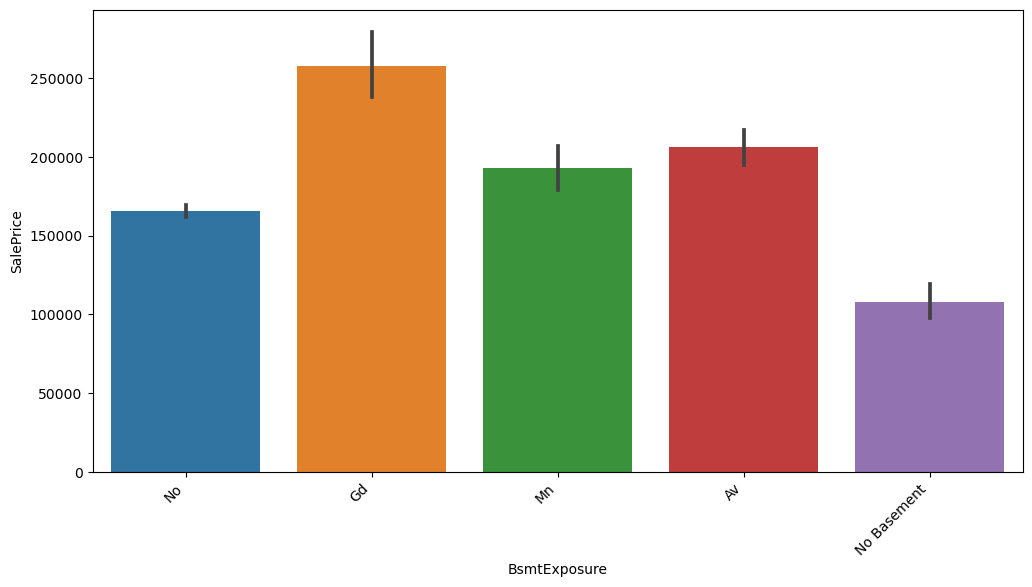

In [153]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='BsmtExposure',y='SalePrice',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

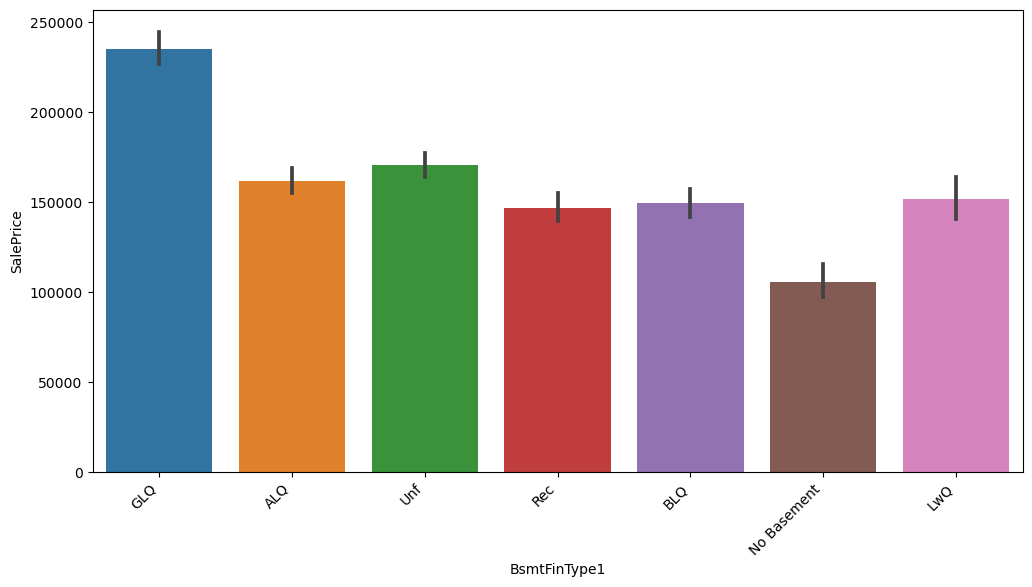

In [154]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='BsmtFinType1',y='SalePrice',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

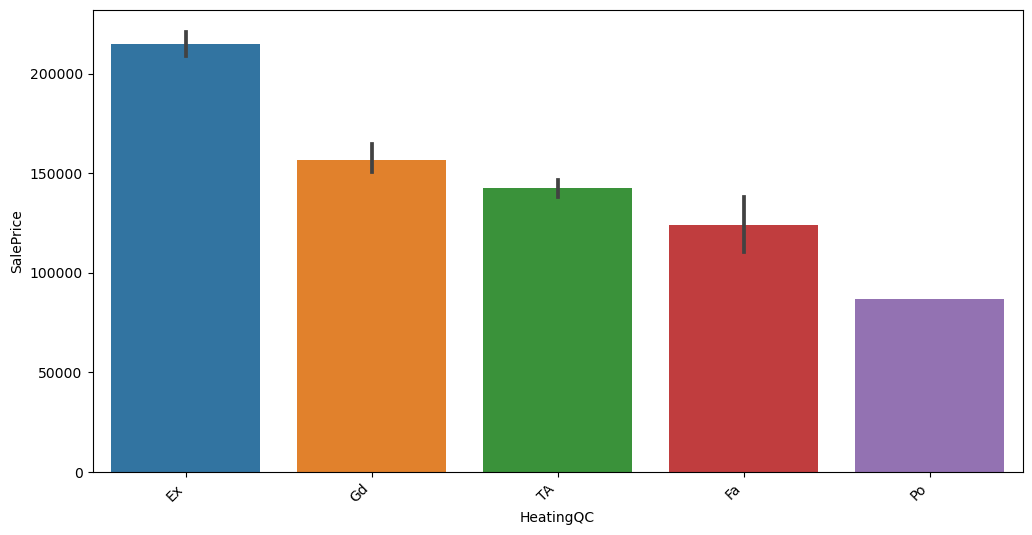

In [155]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='HeatingQC',y='SalePrice',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

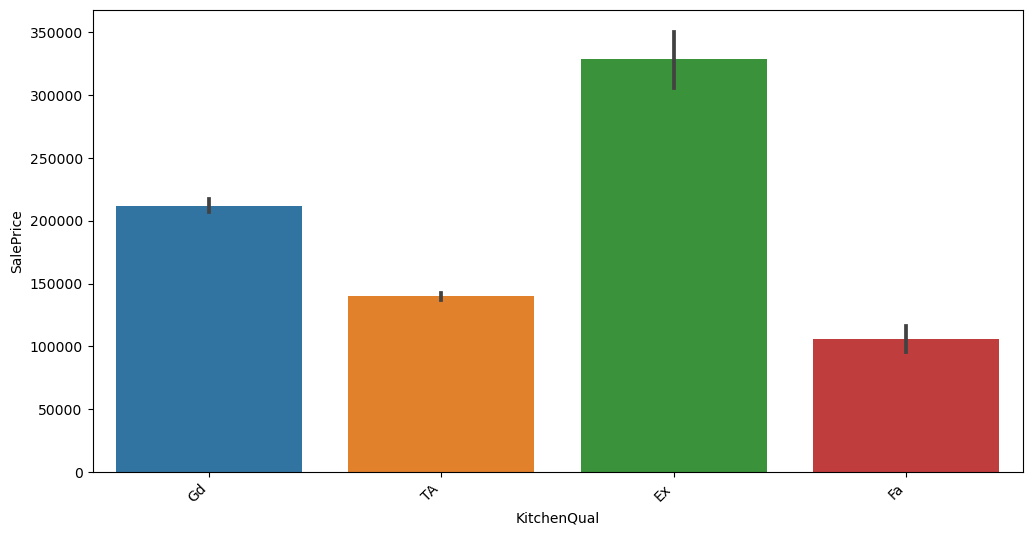

In [156]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='KitchenQual',y='SalePrice',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

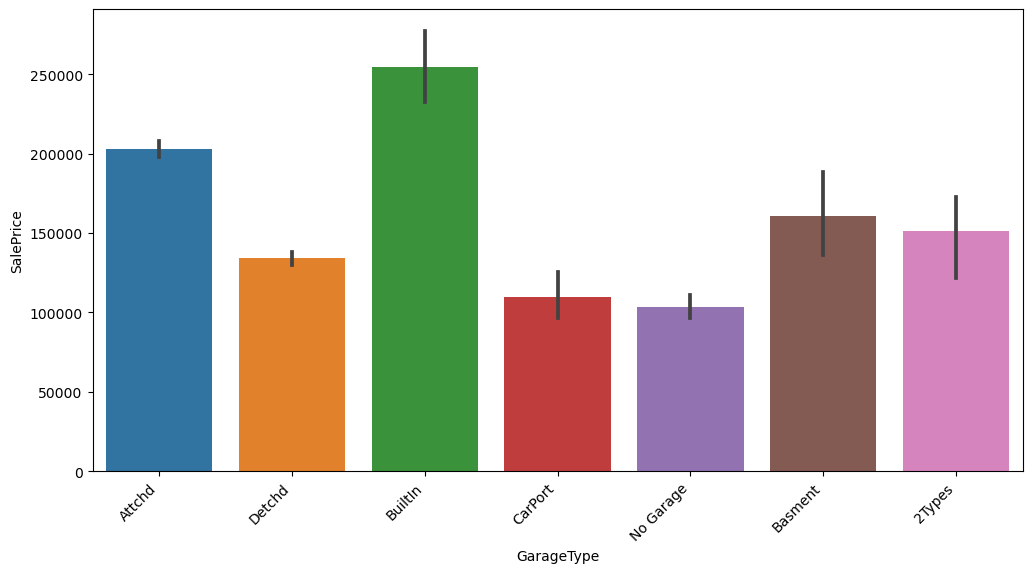

In [157]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='GarageType',y='SalePrice',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

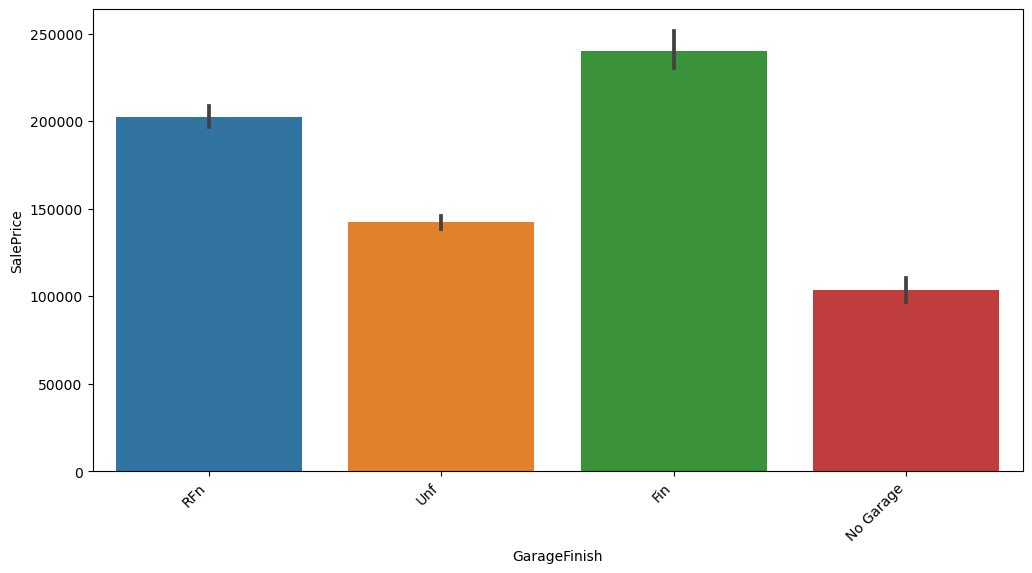

In [158]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.barplot(housing_data,x='GarageFinish',y='SalePrice',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

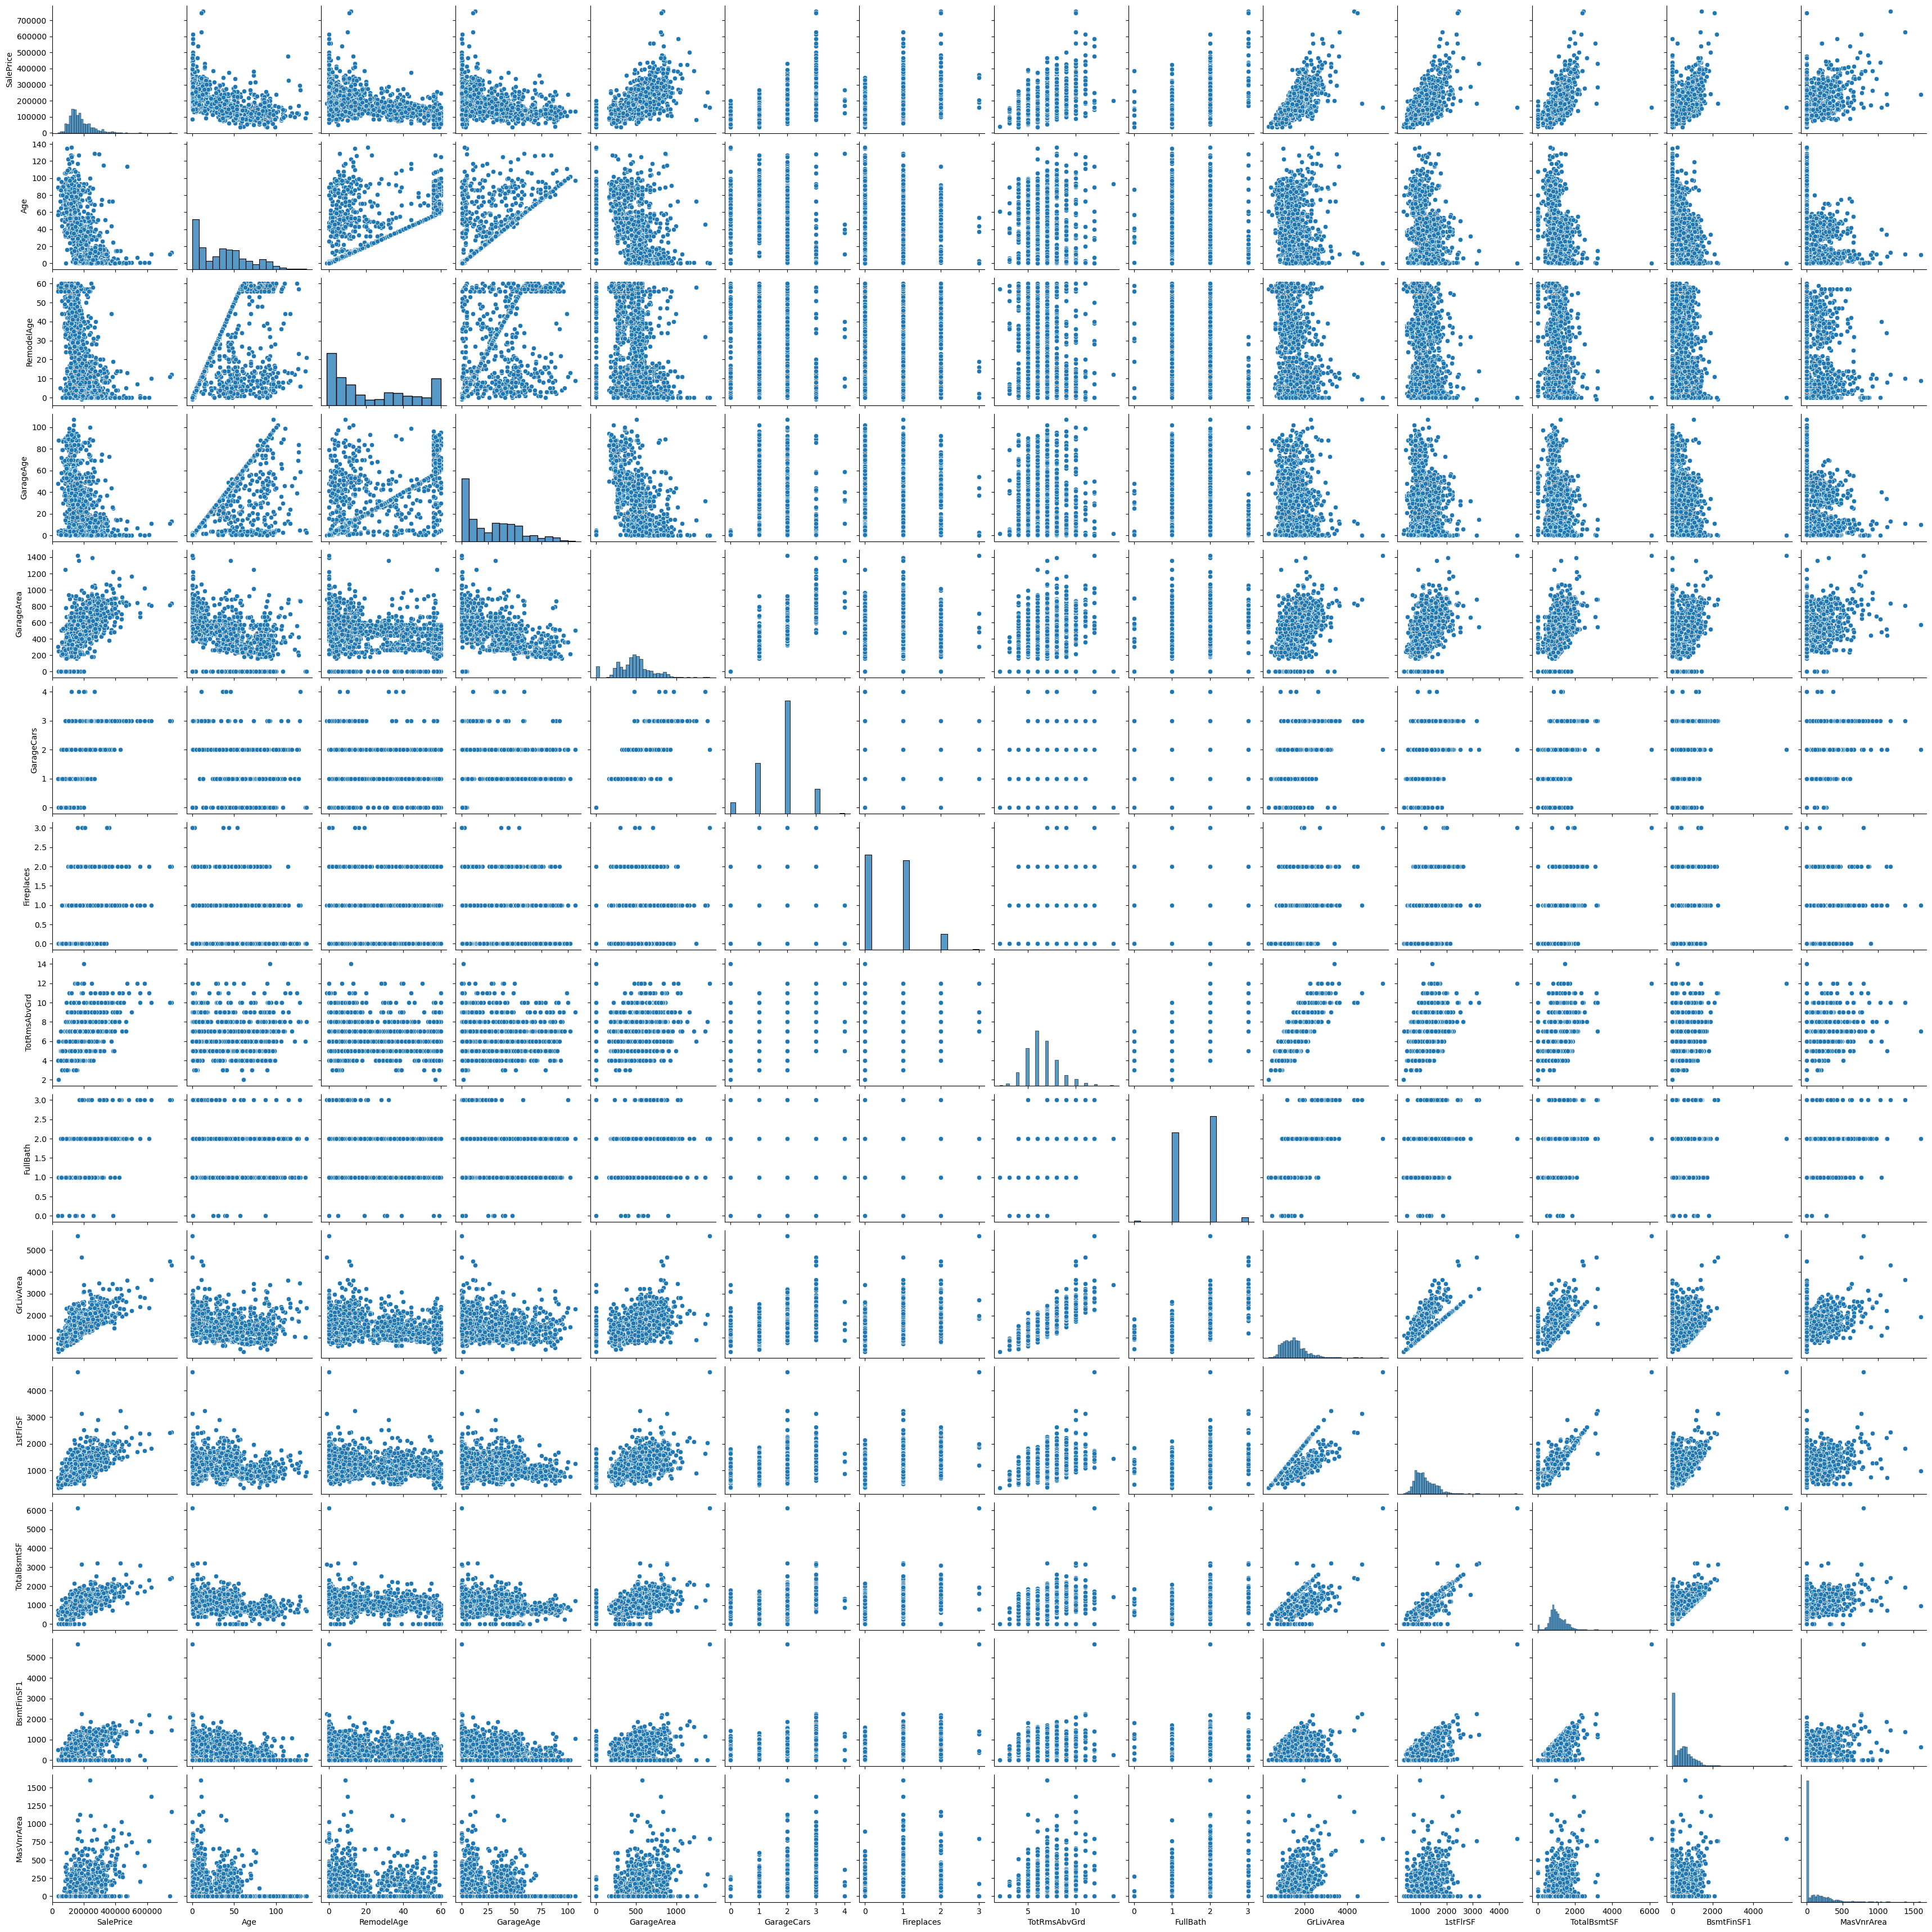

In [159]:
# Pairplot for the numerical values
sbs.pairplot(housing_data[['SalePrice','Age','RemodelAge','GarageAge','GarageArea','GarageCars','Fireplaces','TotRmsAbvGrd','FullBath','GrLivArea','1stFlrSF','TotalBsmtSF','BsmtFinSF1','MasVnrArea']])

In [160]:
housing_data.corr()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.304522    0.178469    0.214367    0.042463   
LotArea           0.304522  1.000000    0.103321    0.214103    0.111170   
MasVnrArea        0.178469  0.103321    1.000000    0.261256   -0.071330   
BsmtFinSF1        0.214367  0.214103    0.261256    1.000000   -0.050117   
BsmtFinSF2        0.042463  0.111170   -0.071330   -0.050117    1.000000   
BsmtUnfSF         0.124098 -0.002618    0.113862   -0.495251   -0.209294   
TotalBsmtSF       0.363472  0.260833    0.360067    0.522396    0.104810   
1stFlrSF          0.413773  0.299475    0.339850    0.445863    0.097117   
2ndFlrSF          0.072388  0.050986    0.173800   -0.137079   -0.099260   
LowQualFinSF      0.037469  0.004779   -0.068628   -0.064503    0.014807   
GrLivArea         0.368007  0.263116    0.388052    0.208171   -0.009640   
BsmtFullBath      0.090343  0.158155    0.083010    0.649212    0.158678   
BsmtHalfBath     -0.006979  0.048046    0.027403    0.067418    0.070948   
FullBath          0.180534  0.126031    0.272999    0.058543   -0.076444   
HalfBath          0.047222  0.014259    0.199108    0.004262   -0.032148   
BedroomAbvGr      0.236840  0.119690    0.102775   -0.107355   -0.015728   
KitchenAbvGr     -0.004905 -0.017784   -0.038450   -0.081007   -0.040751   
TotRmsAbvGrd      0.320518  0.190015    0.279568    0.044316   -0.035227   
Fireplaces        0.233221  0.271364    0.247015    0.260011    0.046921   
GarageCars        0.269539  0.154871    0.361945    0.224054   -0.038264   
GarageArea        0.323511  0.180403    0.370884    0.296970   -0.018227   
WoodDeckSF        0.075542  0.171698    0.159991    0.204306    0.067898   
OpenPorchSF       0.137014  0.084774    0.122528    0.111761    0.003093   
EnclosedPorch     0.010287 -0.018340   -0.109907   -0.102303    0.036543   
3SsnPorch         0.061945  0.020423    0.019144    0.026451   -0.029993   
ScreenPorch       0.037655  0.043160    0.062248    0.062021    0.088871   
PoolArea          0.180819  0.077672    0.011928    0.140491    0.041709   
MiscVal          -0.000255  0.038068   -0.029512    0.003571    0.004940   
SalePrice         0.334771  0.263843    0.472614    0.386420   -0.011378   
Age              -0.116223 -0.014832   -0.311479   -0.248483    0.050422   
RemodelAge       -0.082957 -0.014709   -0.177105   -0.127556    0.069814   
GarageAge        -0.038498  0.041377   -0.209454   -0.118337    0.095781   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
LotFrontage     0.124098     0.363472  0.413773  0.072388      0.037469   
LotArea        -0.002618     0.260833  0.299475  0.050986      0.004779   
MasVnrArea      0.113862     0.360067  0.339850  0.173800     -0.068628   
BsmtFinSF1     -0.495251     0.522396  0.445863 -0.137079     -0.064503   
BsmtFinSF2     -0.209294     0.104810  0.097117 -0.099260      0.014807   
BsmtUnfSF       1.000000     0.415360  0.317987  0.004469      0.028167   
TotalBsmtSF     0.415360     1.000000  0.819530 -0.174512     -0.033245   
1stFlrSF        0.317987     0.819530  1.000000 -0.202646     -0.014241   
2ndFlrSF        0.004469    -0.174512 -0.202646  1.000000      0.063353   
LowQualFinSF    0.028167    -0.033245 -0.014241  0.063353      1.000000   
GrLivArea       0.240257     0.454868  0.566024  0.687501      0.134683   
BsmtFullBath   -0.422900     0.307351  0.244671 -0.169494     -0.047143   
BsmtHalfBath   -0.095804    -0.000315  0.001956 -0.023855     -0.005842   
FullBath        0.288886     0.323722  0.380637  0.421378     -0.000710   
HalfBath       -0.041118    -0.048804 -0.119916  0.609707     -0.027080   
BedroomAbvGr    0.166643     0.050450  0.127401  0.502901      0.105607   
KitchenAbvGr    0.030086    -0.068901  0.068101  0.059306      0.007522   
TotRmsAbvGrd    0.250647     0.285573  0.409516  0.616423      0.131185   
Fireplaces      0.051575     0.339519  0.410531  0.194561     -0.021272   
Garage

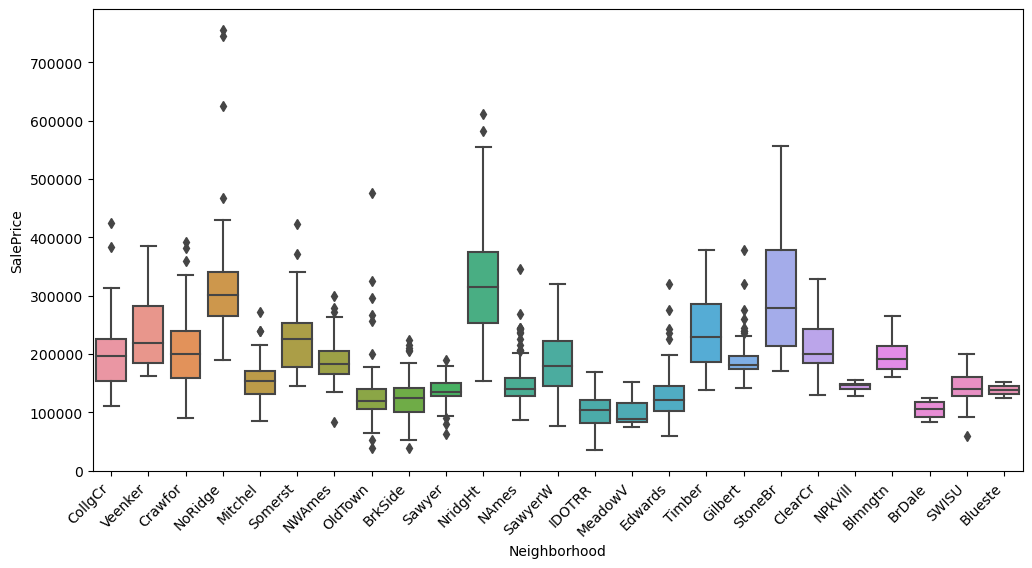

In [161]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="Neighborhood", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

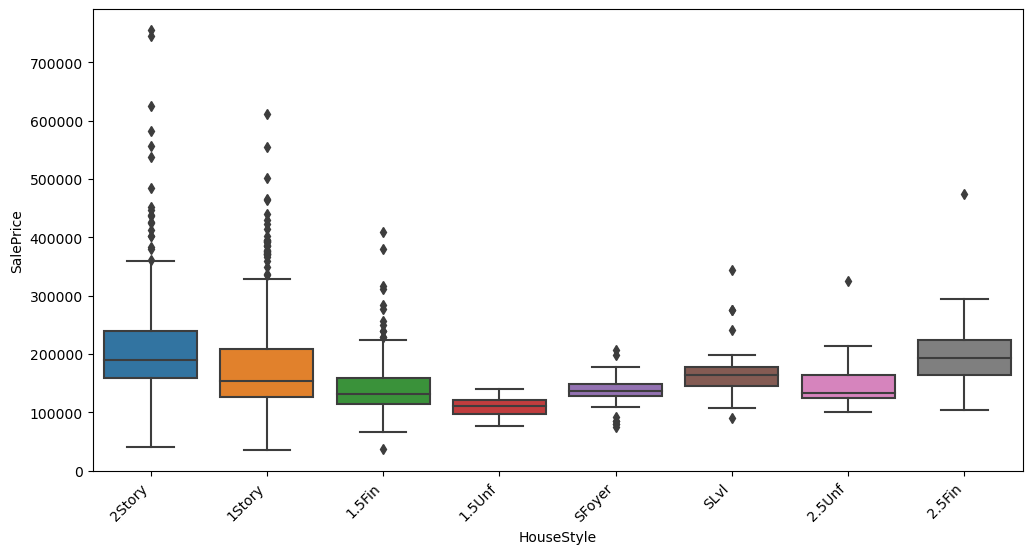

In [162]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="HouseStyle", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

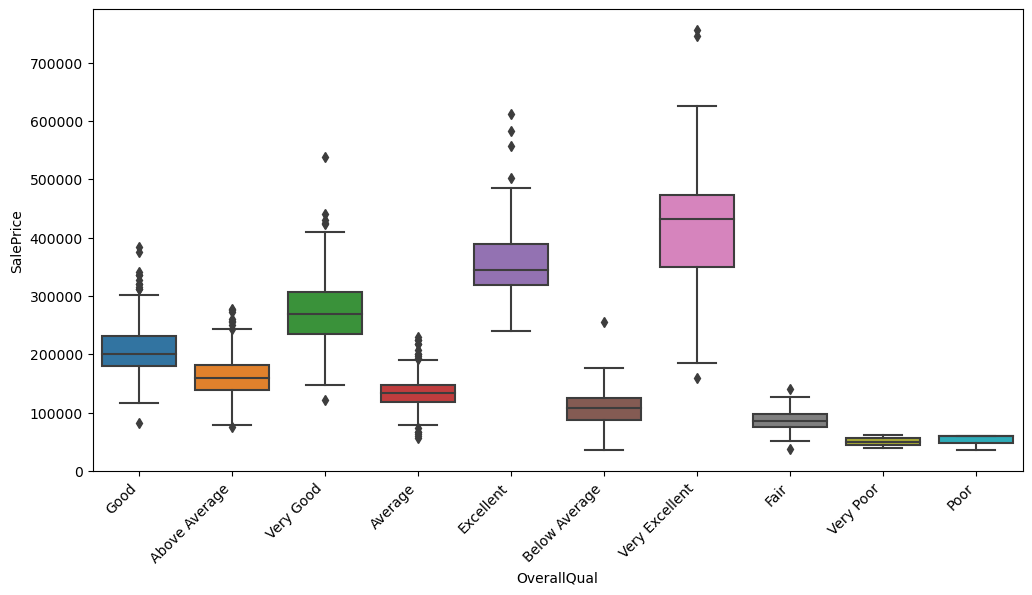

In [163]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="OverallQual", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

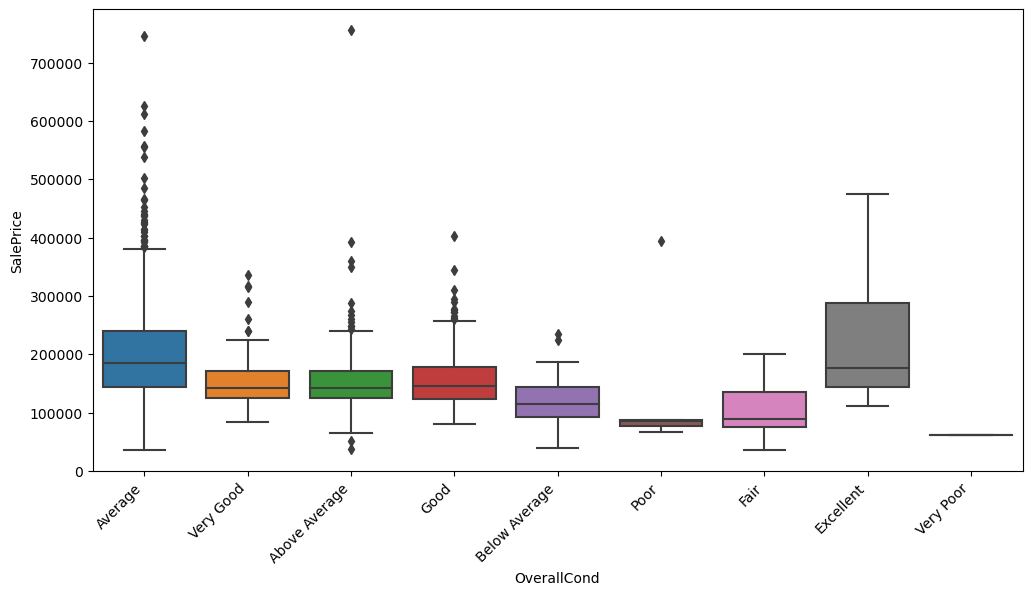

In [164]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="OverallCond", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

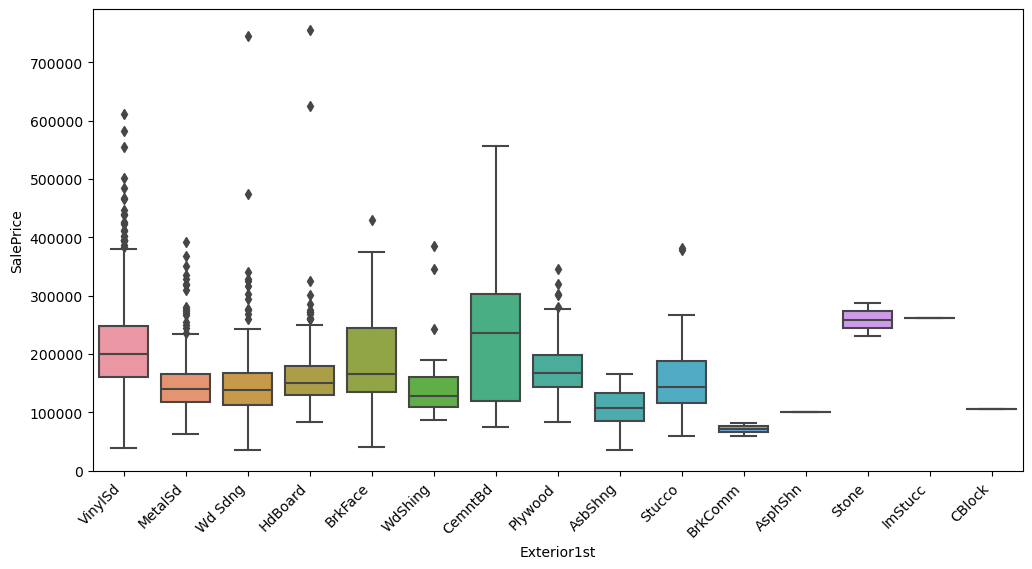

In [165]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="Exterior1st", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

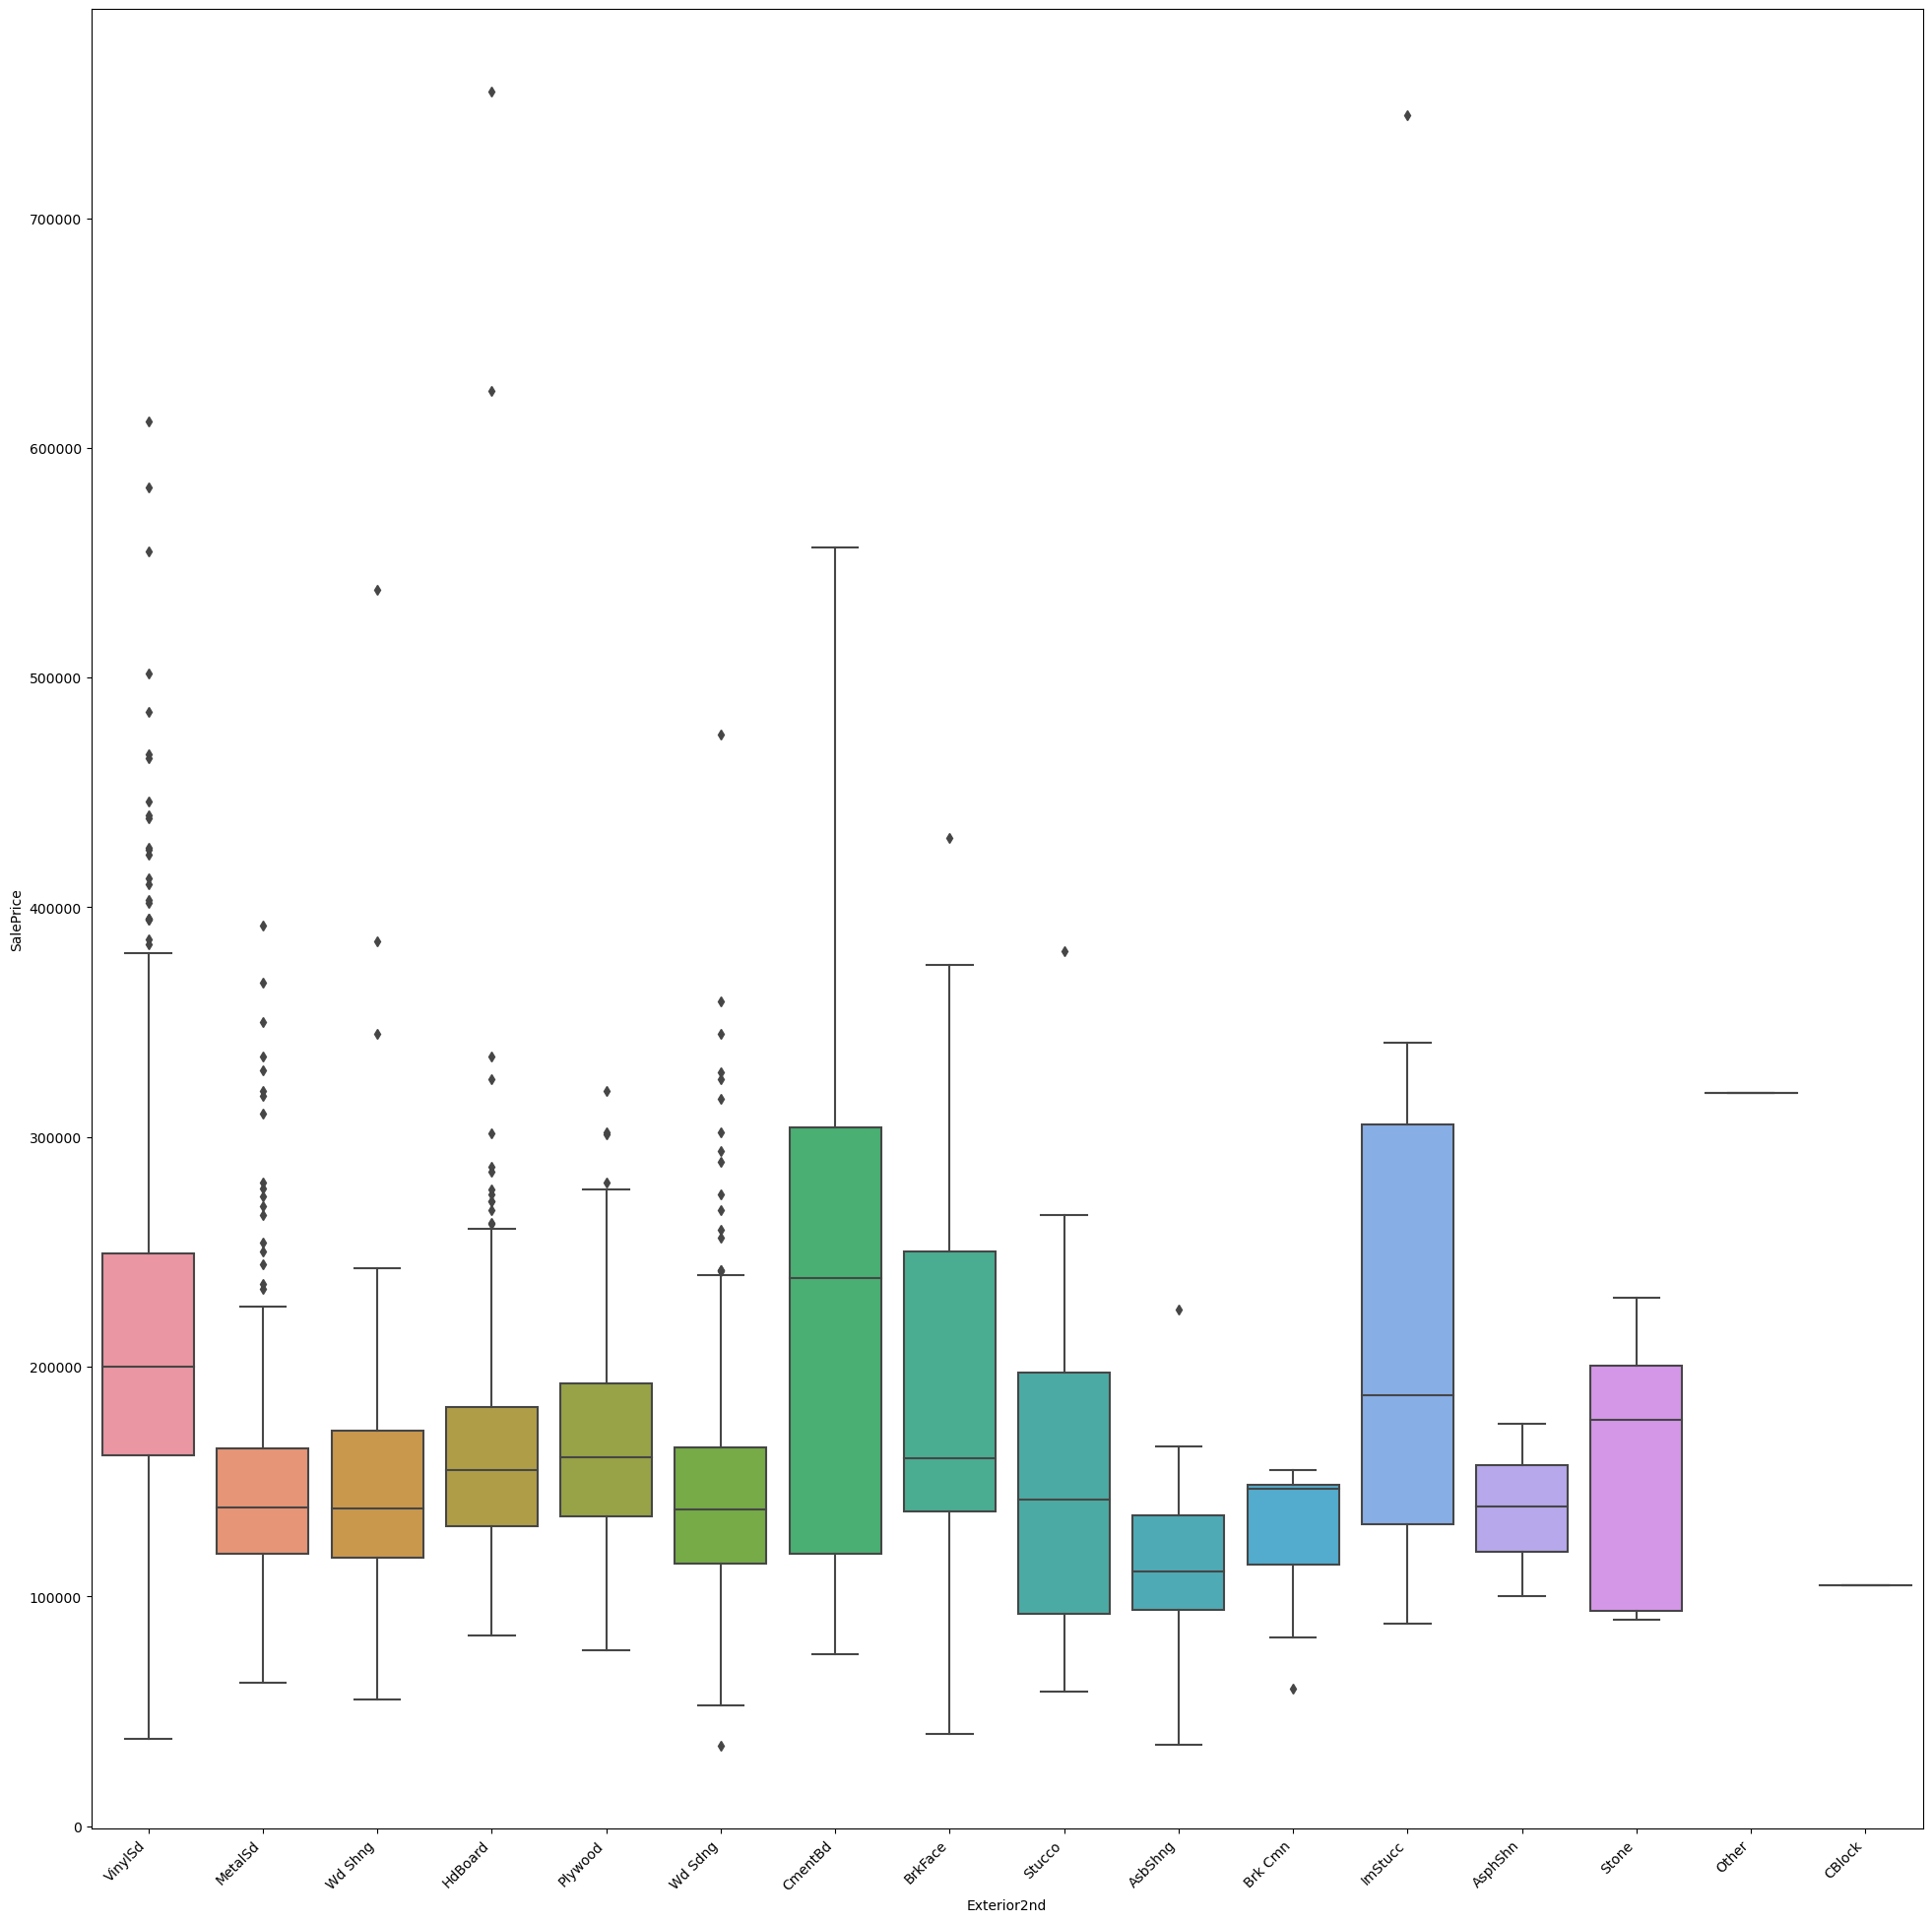

In [166]:
fig, ax = plt.subplots(figsize=(24, 24))
sbs.boxplot(data=housing_data, x="Exterior2nd", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

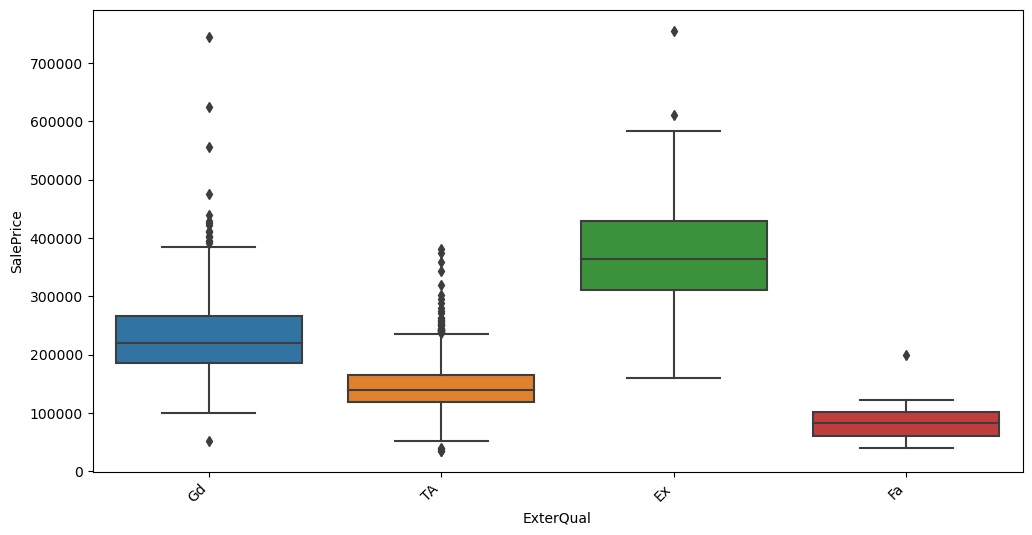

In [167]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="ExterQual", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

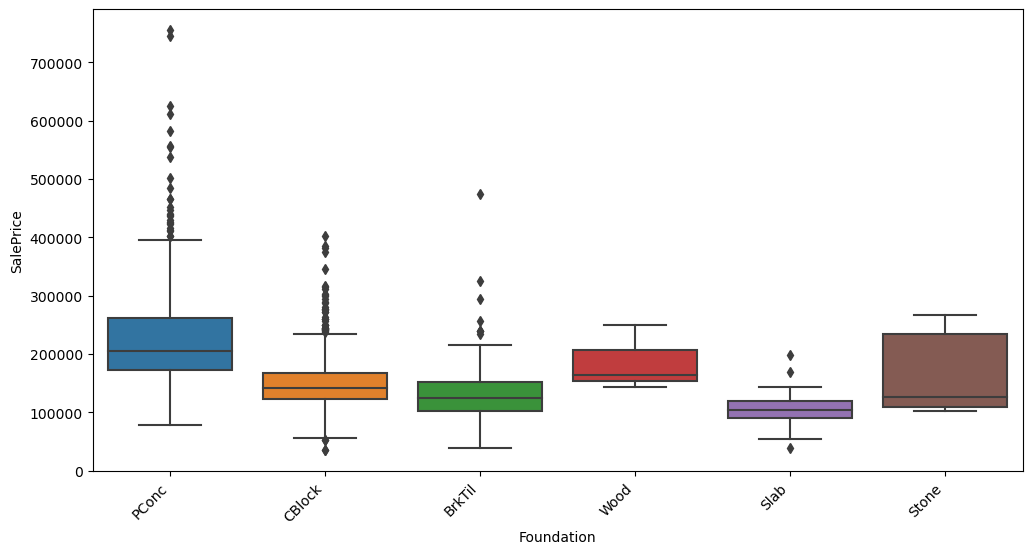

In [168]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="Foundation", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

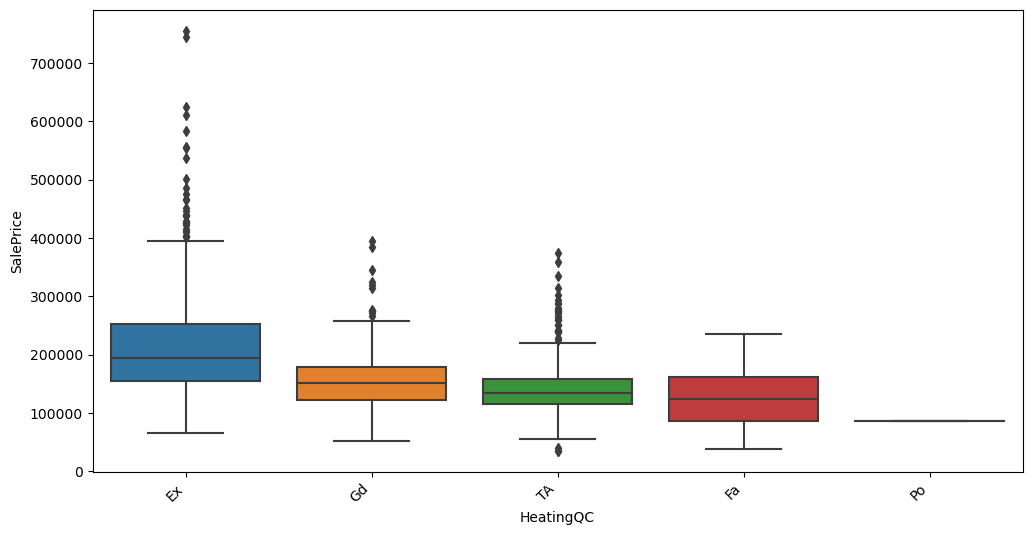

In [169]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="HeatingQC", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

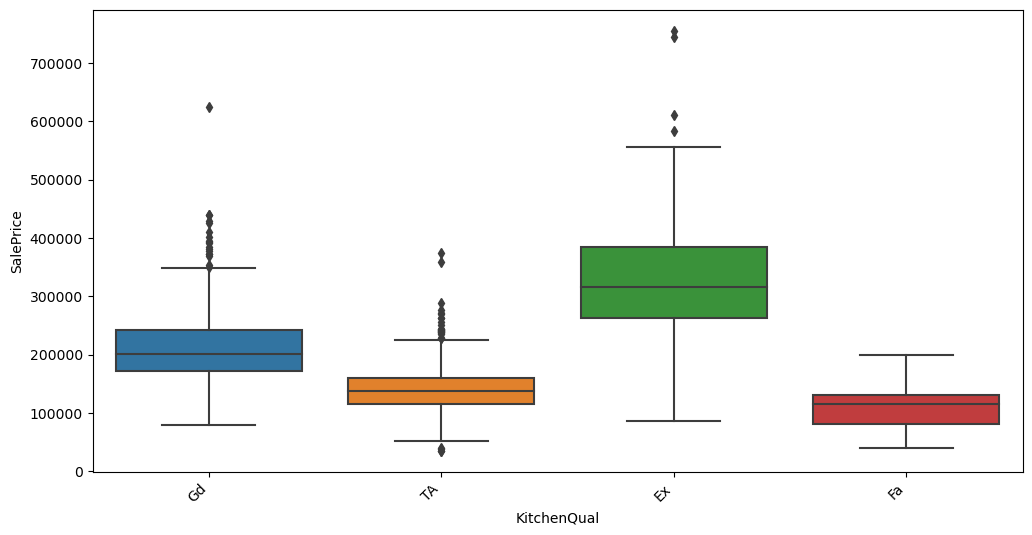

In [170]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="KitchenQual", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

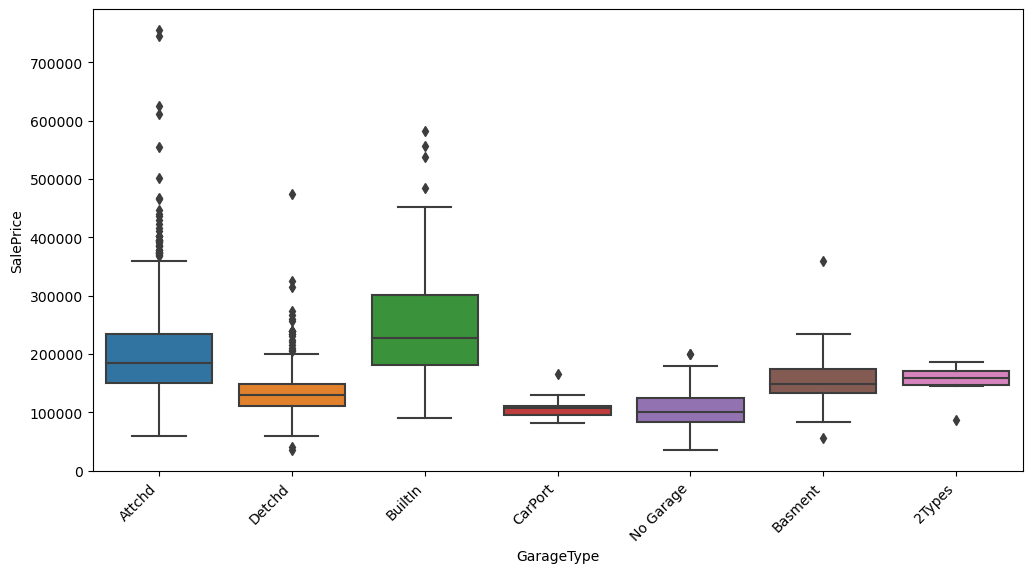

In [171]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="GarageType", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

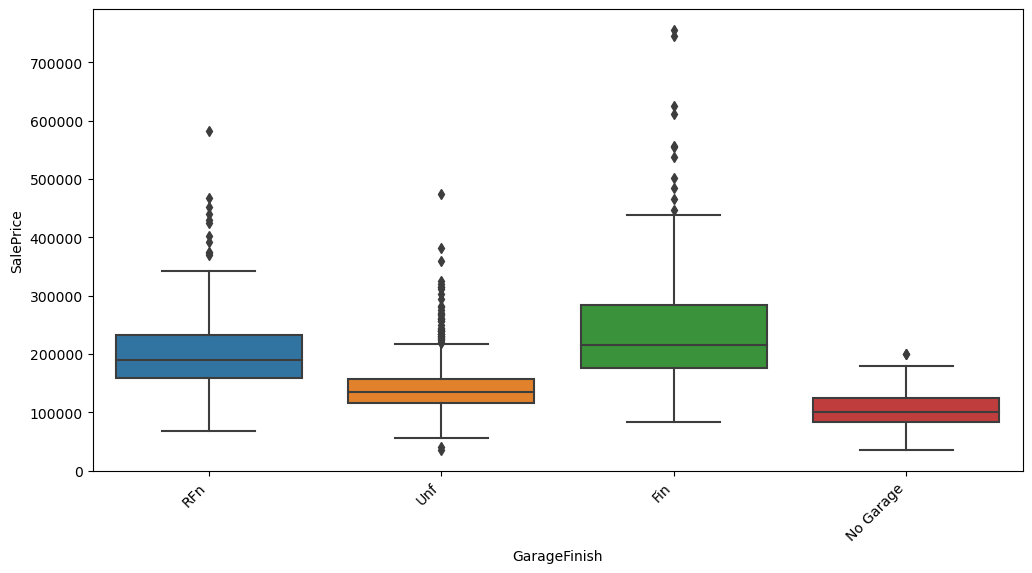

In [172]:
fig, ax = plt.subplots(figsize=(12, 6))
sbs.boxplot(data=housing_data, x="GarageFinish", y="SalePrice")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Insights from data understanding :
###### 1. Total records are 1460 and 80 columns from the dataset
###### 2. Column 'ID' is unique and hence will not contribute to analysis and is dropped
###### 3. Categorical columns like are dropped as they have very large biased data on the following columns
######           MSZoning - RL ,
######           Street - Pave, 
######           LotShape - Reg,
######           LandContour - Lvl,
######           LandSlope - Gtl,
######           Utilities - AllPub,
######           LotConfig - Inside,
######           Condition1 - Norm,
######           Condition2 - Norm,
######           BldgType - 1Fam,
######           RoofStyle - Gable,
######           RoofMatl - RoofMatl,
######           MasVnrType - As 50% data is missing and the majority in the rest is MasVnrType,
######           ExterCond - TA,BsmtCond - TA,
######           BsmtFinType2 - Unf,
######           Heating - GasA,
######           CentralAir - Y,
######           Electrical - SBrkr,
######           Functional - Typ,
######           GarageQual - TA,
######           GarageCond - TA,
######           PavedDrive - Y,
######           SaleType - WD,
######           SaleCondition - Normal
###### 4. Missing values imputed with Median for numerical values LotFrontage and MasVnrArea as there are outliers and mode for categorical values ######     BsmtQual, BsmtExposure, BsmtFinType1, GarageType, GarageFinish,GarageYrBlt
###### 5. New derived variable for Age of the building , Remodelage and Garage age is derived
###### 6. Amoung the numerical values there is maximum postive correlation with the below variables MasVnrArea, BsmtFinSF1, TotalBsmtSF,   ######   1stFlrSF,   GrLivArea, FullBath,TotRmsAbvGrd,Fireplaces GarageCars and negative correlation for variables ,Age ,RemodelAge
###### 7. For variable MSSubClass,SalePrice is maximum for 2-STORY 1946 & NEWER
###### 8. For variable LotFrontage majority is between 70 to 80
###### 9. For variable TotalBsmtSF and 1stFlrSF majority is around 1000
###### 10. For variable GrLivArea 	majority is between 1000 and 2000
###### 11. For variable FullBath majority is 2
###### 12. For variable Neighborhood the sale price is max for Nridght
###### 13. For the variable HouseStyle the sale price is max for 2.5 Fin
###### 14. For the variable OverallQual the sale price is max for Very Excellent
###### 15. For the variable OverallCond the sale price is max for Excellent
###### 16. For the variable Exterior1st the sale price is max for Stone
###### 17. For the variable Exterior2nd the sale price is max for CmentBd
###### 18. For the variable ExterQual the sale price is max for Ex
###### 19. For the variable Foundation the sale price is max for PConc
###### 20. For the variable BsmtQual the sale price is max for Ex
###### 21. For the variable TotRmsAbvGrd majority has 6 rooms
###### 22. For the variable GarageCars majority has space for 2 cars
###### 23. For the variable BsmtExposure Sale price is max for Gd
###### 24. For the variable BsmtFinType1 Sale price is max for GLQ
###### 25. For the variable HeatingQC Sale price is max for EX
###### 26. For the variable KitchenQual the sale price is max for Ex
###### 27. For the variable GarageType the sale price is max for BuiltIn
###### 28. For the variable GarageFinish the sale price is max for Fin
###### 29. TotalBsmtSF -> majority houses lies around 1000 sq ft
###### 30.Age -> Majority of the houses are within 10 years old.
###### 31. Sale price -> Majority of the house have a sale price within 200000 and outlier treatment done for SalePrice
###### 32. For the variable GrLivArea majority lies within 1000 and 2000 sq ft







### Data preparation

In [173]:
housing_data.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014     1.767123   
std        0.815778      0.220338      1.625393     0.644666     0.747315   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal      SalePrice          Age  \
count  1460.000000  1460.000000   1460.000000    1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041  180921.195890    36.547945   
std      55.757415    40.177307    496.123024   79442.502883    30.250152   
min       0.000000     0.000000      0.000000   34900.000000     0.000000   
25%       0.000000     0.000000      0.000000  129975.000000     8.000000   
50%       0.000000     0.000000      0.000000  163000.000000    35.000000   
75%       0.000000     0.000000      0.0000

In [174]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Neighborhood   1460 non-null   object 
 4   HouseStyle     1460 non-null   object 
 5   OverallQual    1460 non-null   object 
 6   OverallCond    1460 non-null   object 
 7   Exterior1st    1460 non-null   object 
 8   Exterior2nd    1460 non-null   object 
 9   MasVnrArea     1460 non-null   float64
 10  ExterQual      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  BsmtQual       1460 non-null   object 
 13  BsmtExposure   1460 non-null   object 
 14  BsmtFinType1   1460 non-null   object 
 15  BsmtFinSF1     1460 non-null   int64  
 16  BsmtFinSF2     1460 non-null   int64  
 17  BsmtUnfSF      1460 non-null   int64  
 18  TotalBsm

##### Dummy variable creation for categorical data

In [175]:

MSSubClass = pd.get_dummies(housing_data['MSSubClass'],drop_first=True,prefix='MSSubClass',prefix_sep='_')
MSSubClass

MSSubClass_1-STORY 1945 & OLDER  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   
...                               ...   
1455                                0   
1456                                0   
1457                                0   
1458                                0   
1459                                0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
1455                                           0   
1456                                           1   
1457                                           0   
1458                                           1   
1459                                           1   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                     0                  
1                                                     0                  
2                                                     0                  
3                                                     0                  
4                                                     0                  
...                                                 ...                  
1455                                                  0                  
1456                                                  0                  
1457                                                  0                  
1458                                                  0                  
1459                                                  0                  

      MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  \
0                                   0                                1   
1                                   0                                0   
2                                   0                                1   
3                                   1                                0   
4                                   0                                1   
...                               ...                              ...   
1455                                0                                1   
1456                                0                                0   
1457                                1                                0   
1458                                0                                0   
1459                                0                                0   

      MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
1455                                      0   
1456                                      0   
1457                                      0   
1458                                      0   
1459                                      0   

      MSSubClass_DUPLEX - ALL STYLES AND AGES  MSSubClass_OTHERS  \
0                                           0                  0   
1                                           0                  0   
2                                           0                  0   
3                                           0                  0   
4                                           0                  0   
...                                       ...                ...   
1455                                        0                  0   
1

In [176]:
Neighborhood = pd.get_dummies(housing_data['Neighborhood'],drop_first=True,prefix='Neighborhood',prefix_sep='_')
Neighborhood

Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   
...                    ...                  ...                   ...   
1455                     0                    0                     0   
1456                     0                    0                     0   
1457                     0                    0                     0   
1458                     0                    0                     0   
1459                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                        0                     1                     0   
1                        0                     0                     0   
2                        0                     1                     0   
3                        0                     0                     1   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0                     0                     0   
1456                     0                     0                     0   
1457                     0                     0                     1   
1458                     0                     0                     0   
1459                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
1455                     0                     1                    0   
1456                     0                     0                    0   
1457                     0                     0                    0   
1458                     0                     0                    0   
1459                     1                     0                    0   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   0   
...                    ...                   ...                 ...   
1455                     0                     0                   0   
1456                     0                     0                   0   
1457                     0                     0                   0   
1458                     0                     0                   1   
1459                     0                     0                   0   

      Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     1   
...                    ...                  ...             

In [177]:
HouseStyle = pd.get_dummies(housing_data['HouseStyle'],drop_first=True,prefix='HouseStyle',prefix_sep='_')
HouseStyle

HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  \
0                     0                  0                  0   
1                     0                  1                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
1455                  0                  0                  0   
1456                  0                  1                  0   
1457                  0                  0                  0   
1458                  0                  1                  0   
1459                  0                  1                  0   

      HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  
0                     0                  1                  0                0  
1                     0                  0                  0                0  
2                     0                  1                  0                0  
3                     0                  1                  0                0  
4                     0                  1                  0                0  
...                 ...                ...                ...              ...  
1455                  0                  1                  0                0  
1456                  0                  0                  0                0  
1457                  0                  1                  0                0  
1458                  0                  0                  0                0  
1459                  0                  0                  0                0  

[1460 rows x 7 columns]

In [178]:
OverallQual = pd.get_dummies(housing_data['OverallQual'],drop_first=True,prefix='OverallQual',prefix_sep='_')
OverallQual

OverallQual_Average  OverallQual_Below Average  OverallQual_Excellent  \
0                       0                          0                      0   
1                       0                          0                      0   
2                       0                          0                      0   
3                       0                          0                      0   
4                       0                          0                      0   
...                   ...                        ...                    ...   
1455                    0                          0                      0   
1456                    0                          0                      0   
1457                    0                          0                      0   
1458                    1                          0                      0   
1459                    1                          0                      0   

      OverallQual_Fair  OverallQual_Good  OverallQual_Poor  \
0                    0                 1                 0   
1                    0                 0                 0   
2                    0                 1                 0   
3                    0                 1                 0   
4                    0                 0                 0   
...                ...               ...               ...   
1455                 0                 0                 0   
1456                 0                 0                 0   
1457                 0                 1                 0   
1458                 0                 0                 0   
1459                 0                 0                 0   

      OverallQual_Very Excellent  OverallQual_Very Good  OverallQual_Very Poor  
0                              0                      0                      0  
1                              0                      0                      0  
2                              0                      0                      0  
3                              0                      0                      0  
4                              0                      1                      0  
...                          ...                    ...                    ...  
1455                           0                      0                      0  
1456                           0                      0                      0  
1457                           0                      0                      0  
1458                           0                      0                      0  
1459                           0                      0                      0  

[1460 rows x 9 columns]

In [179]:
OverallCond = pd.get_dummies(housing_data['OverallCond'],drop_first=True,prefix='OverallCond',prefix_sep='_')
OverallCond

OverallCond_Average  OverallCond_Below Average  OverallCond_Excellent  \
0                       1                          0                      0   
1                       0                          0                      0   
2                       1                          0                      0   
3                       1                          0                      0   
4                       1                          0                      0   
...                   ...                        ...                    ...   
1455                    1                          0                      0   
1456                    0                          0                      0   
1457                    0                          0                      1   
1458                    0                          0                      0   
1459                    0                          0                      0   

      OverallCond_Fair  OverallCond_Good  OverallCond_Poor  \
0                    0                 0                 0   
1                    0                 0                 0   
2                    0                 0                 0   
3                    0                 0                 0   
4                    0                 0                 0   
...                ...               ...               ...   
1455                 0                 0                 0   
1456                 0                 0                 0   
1457                 0                 0                 0   
1458                 0                 0                 0   
1459                 0                 0                 0   

      OverallCond_Very Good  OverallCond_Very Poor  
0                         0                      0  
1                         1                      0  
2                         0                      0  
3                         0                      0  
4                         0                      0  
...                     ...                    ...  
1455                      0                      0  
1456                      0                      0  
1457                      0                      0  
1458                      0                      0  
1459                      0                      0  

[1460 rows x 8 columns]

In [180]:
Exterior1st = pd.get_dummies(housing_data['Exterior1st'],drop_first=True,prefix='Exterior1st',prefix_sep='_')
Exterior1st

Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ...                  ...                  ...   
1455                    0                    0                    0   
1456                    0                    0                    0   
1457                    0                    0                    0   
1458                    0                    0                    0   
1459                    0                    0                    0   

      Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    0                    0   
...                  ...                  ...                  ...   
1455                   0                    0                    0   
1456                   0                    0                    0   
1457                   0                    1                    0   
1458                   0                    0                    0   
1459                   0                    0                    1   

      Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  \
0                       0                    0                    0   
1                       0                    1                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ...                  ...                  ...   
1455                    0                    0                    0   
1456                    0                    0                    1   
1457                    0                    0                    0   
1458                    0                    1                    0   
1459                    0                    0                    0   

      Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  \
0                     0                   0                    1   
1                     0                   0                    0   
2                     0                   0                    1   
3                     0                   0                    0   
4                     0                   0                    1   
...                 ...                 ...                  ...   
1455                  0                   0                    1   
1456                  0                   0                    0   
1457                  0                   0                    0   
1458                  0                   0                    0   
1459                  0                   0                    0   

      Exterior1st_Wd Sdng  Exterior1st_WdShing  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       1                    0  
4                       0                    0  
...                   ...                  ...  
1455                    0                    0  
1456                    0                    0  
1457                    0                    0  
1458                    0                    0  
1459                    0                    0  

[1460 rows x 14 columns]

In [181]:
Exterior2nd = pd.get_dummies(housing_data['Exterior2nd'],drop_first=True,prefix='Exterior2nd',prefix_sep='_')
Exterior2nd

Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ...                  ...                  ...   
1455                    0                    0                    0   
1456                    0                    0                    0   
1457                    0                    0                    0   
1458                    0                    0                    0   
1459                    0                    0                    0   

      Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_HdBoard  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    0                    0   
...                  ...                  ...                  ...   
1455                   0                    0                    0   
1456                   0                    0                    0   
1457                   0                    1                    0   
1458                   0                    0                    0   
1459                   0                    0                    1   

      Exterior2nd_ImStucc  Exterior2nd_MetalSd  Exterior2nd_Other  \
0                       0                    0                  0   
1                       0                    1                  0   
2                       0                    0                  0   
3                       0                    0                  0   
4                       0                    0                  0   
...                   ...                  ...                ...   
1455                    0                    0                  0   
1456                    0                    0                  0   
1457                    0                    0                  0   
1458                    0                    1                  0   
1459                    0                    0                  0   

      Exterior2nd_Plywood  Exterior2nd_Stone  Exterior2nd_Stucco  \
0                       0                  0                   0   
1                       0                  0                   0   
2                       0                  0                   0   
3                       0                  0                   0   
4                       0                  0                   0   
...                   ...                ...                 ...   
1455                    0                  0                   0   
1456                    1                  0                   0   
1457                    0                  0                   0   
1458                    0                  0                   0   
1459                    0                  0                   0   

      Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  
0                       1                    0                    0  
1                       0                    0                    0  
2                       1                    0                    0  
3                       0                    0                    1  
4                       1                    0                    0  
...                   ...                  ...                  ...  
1455                    1                    0                    0  
1456                    0                    0                    0  
1457                    0           

In [182]:
ExterQual = pd.get_dummies(housing_data['ExterQual'],drop_first=True,prefix='ExterQual',prefix_sep='_')
ExterQual

ExterQual_Fa  ExterQual_Gd  ExterQual_TA
0                0             1             0
1                0             0             1
2                0             1             0
3                0             0             1
4                0             1             0
...            ...           ...           ...
1455             0             0             1
1456             0             0             1
1457             0             0             0
1458             0             0             1
1459             0             1             0

[1460 rows x 3 columns]

In [183]:
Foundation = pd.get_dummies(housing_data['Foundation'],drop_first=True,prefix='Foundation',prefix_sep='_')
Foundation

Foundation_CBlock  Foundation_PConc  Foundation_Slab  Foundation_Stone  \
0                     0                 1                0                 0   
1                     1                 0                0                 0   
2                     0                 1                0                 0   
3                     0                 0                0                 0   
4                     0                 1                0                 0   
...                 ...               ...              ...               ...   
1455                  0                 1                0                 0   
1456                  1                 0                0                 0   
1457                  0                 0                0                 1   
1458                  1                 0                0                 0   
1459                  1                 0                0                 0   

      Foundation_Wood  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
1455                0  
1456                0  
1457                0  
1458                0  
1459                0  

[1460 rows x 5 columns]

In [184]:
BsmtQual = pd.get_dummies(housing_data['BsmtQual'],drop_first=True,prefix='BsmtQual',prefix_sep='_')
BsmtQual

BsmtQual_Fa  BsmtQual_Gd  BsmtQual_No Basement  BsmtQual_TA
0               0            1                     0            0
1               0            1                     0            0
2               0            1                     0            0
3               0            0                     0            1
4               0            1                     0            0
...           ...          ...                   ...          ...
1455            0            1                     0            0
1456            0            1                     0            0
1457            0            0                     0            1
1458            0            0                     0            1
1459            0            0                     0            1

[1460 rows x 4 columns]

In [185]:
BsmtExposure = pd.get_dummies(housing_data['BsmtExposure'],drop_first=True,prefix='BsmtExposure',prefix_sep='_')
BsmtExposure

BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                   0                0                1   
1                   1                0                0   
2                   0                1                0   
3                   0                0                1   
4                   0                0                0   
...               ...              ...              ...   
1455                0                0                1   
1456                0                0                1   
1457                0                0                1   
1458                0                1                0   
1459                0                0                1   

      BsmtExposure_No Basement  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
1455                         0  
1456                         0  
1457                         0  
1458                         0  
1459                         0  

[1460 rows x 4 columns]

In [186]:
BsmtFinType1 = pd.get_dummies(housing_data['BsmtFinType1'],drop_first=True,prefix='BsmtFinType1',prefix_sep='_')
BsmtFinType1

BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                    0                 1                 0   
1                    0                 0                 0   
2                    0                 1                 0   
3                    0                 0                 0   
4                    0                 1                 0   
...                ...               ...               ...   
1455                 0                 0                 0   
1456                 0                 0                 0   
1457                 0                 1                 0   
1458                 0                 1                 0   
1459                 1                 0                 0   

      BsmtFinType1_No Basement  BsmtFinType1_Rec  BsmtFinType1_Unf  
0                            0                 0                 0  
1                            0                 0                 0  
2                            0                 0                 0  
3                            0                 0                 0  
4                            0                 0                 0  
...                        ...               ...               ...  
1455                         0                 0                 1  
1456                         0                 0                 0  
1457                         0                 0                 0  
1458                         0                 0                 0  
1459                         0                 0                 0  

[1460 rows x 6 columns]

In [187]:
HeatingQC = pd.get_dummies(housing_data['HeatingQC'],drop_first=True,prefix='HeatingQC',prefix_sep='_')
HeatingQC

HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA
0                0             0             0             0
1                0             0             0             0
2                0             0             0             0
3                0             1             0             0
4                0             0             0             0
...            ...           ...           ...           ...
1455             0             0             0             0
1456             0             0             0             1
1457             0             0             0             0
1458             0             1             0             0
1459             0             1             0             0

[1460 rows x 4 columns]

In [188]:
KitchenQual = pd.get_dummies(housing_data['KitchenQual'],drop_first=True,prefix='KitchenQual',prefix_sep='_')
KitchenQual

KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA
0                  0               1               0
1                  0               0               1
2                  0               1               0
3                  0               1               0
4                  0               1               0
...              ...             ...             ...
1455               0               0               1
1456               0               0               1
1457               0               1               0
1458               0               1               0
1459               0               0               1

[1460 rows x 3 columns]

In [189]:
GarageType = pd.get_dummies(housing_data['GarageType'],drop_first=True,prefix='GarageType',prefix_sep='_')
GarageType

GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                     1                   0                   0   
1                     1                   0                   0   
2                     1                   0                   0   
3                     0                   0                   0   
4                     1                   0                   0   
...                 ...                 ...                 ...   
1455                  1                   0                   0   
1456                  1                   0                   0   
1457                  1                   0                   0   
1458                  1                   0                   0   
1459                  1                   0                   0   

      GarageType_CarPort  GarageType_Detchd  GarageType_No Garage  
0                      0                  0                     0  
1                      0                  0                     0  
2                      0                  0                     0  
3                      0                  1                     0  
4                      0                  0                     0  
...                  ...                ...                   ...  
1455                   0                  0                     0  
1456                   0                  0                     0  
1457                   0                  0                     0  
1458                   0                  0                     0  
1459                   0                  0                     0  

[1460 rows x 6 columns]

In [190]:
GarageFinish = pd.get_dummies(housing_data['GarageFinish'],drop_first=True,prefix='GarageFinish',prefix_sep='_')
GarageFinish

GarageFinish_No Garage  GarageFinish_RFn  GarageFinish_Unf
0                          0                 1                 0
1                          0                 1                 0
2                          0                 1                 0
3                          0                 0                 1
4                          0                 1                 0
...                      ...               ...               ...
1455                       0                 1                 0
1456                       0                 0                 1
1457                       0                 1                 0
1458                       0                 0                 1
1459                       0                 0                 0

[1460 rows x 3 columns]

In [191]:
# Merge all the dummy variable categories to housing_data
housing_data = pd.concat([housing_data,MSSubClass,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish],axis=1)

In [192]:
# Drop the original variables as there are newly derived columns from the categorical data of 'season', 'weathersit','mnth','weekday'
housing_data = housing_data.drop(columns=['MSSubClass','Neighborhood','HouseStyle','OverallQual','OverallCond','Exterior1st','Exterior2nd','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','GarageType','GarageFinish'])

In [193]:
housing_data.shape

(1460, 156)

In [194]:
housing_data.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2         548           0           61              0   
1           1           2         460         298            0              0   
2           1           2         608           0           42              0   
3           1           3         642           0           35            272   
4           1           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  Age  RemodelAge  \
0          0            0         0        0     208500    5           5   
1          0            0         0        0     181500   31          31   
2          0            0         0        0     223500    7           6   
3          0            0         0        0     140000   91          36   
4          0            0         0        0     250000    8           8   

   GarageAge  MSSubClass_1-STORY 1945 & OLDER  \
0        5.0                                0   
1       31.0                                0   
2        7.0                                0   
3        8.0                                0   
4        8.0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  \
0                                0                                1   
1                                0                                0   
2                                0                                1   
3                                1                                0   
4                                0                                1   

   MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   


In [195]:
#### Use RFE to get the most important features
df_train,df_test = train_test_split(housing_data,train_size=0.7,random_state= 100)
df_train.shape

(1021, 156)

In [196]:
# Scaling using MinMax scaler
scaler = MinMaxScaler()

In [197]:
# Scaling the numeric variables to similar magnitude for interpretability of the model
numeric_var = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice','Age','RemodelAge','GarageAge']
df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])
df_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
318      0.236301  0.039403        0.16    0.174876    0.000000   0.154110   
239      0.106164  0.033981        0.00    0.016655    0.000000   0.274401   
986      0.130137  0.017931        0.00    0.000000    0.000000   0.207620   
1416     0.133562  0.046139        0.00    0.000000    0.000000   0.332620   
390      0.099315  0.032409        0.00    0.042700    0.265265   0.098031   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
318      0.220458  0.231481  0.616949           0.0   0.424289      0.333333   
239      0.120295  0.098611  0.333656           0.0   0.201576      0.000000   
986      0.079378  0.145602  0.307022           0.0   0.230015      0.000000   
1416     0.127169  0.202315  0.505569           0.0   0.355880      0.000000   
390      0.140917  0.136343  0.196610           0.0   0.178517      0.333333   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
318            0.0  0.666667       0.5         0.500           0.0   
239            0.0  0.333333       0.5         0.375           0.0   
986            0.0  0.333333       0.0         0.250           0.0   
1416           0.0  0.666667       0.0         0.500           0.5   
390            0.0  0.333333       0.0         0.500           0.0   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
318       0.545455    0.333333        0.75    0.462623    0.396733   
239       0.363636    0.333333        0.25    0.155148    0.000000   
986       0.181818    0.000000        0.25    0.179831    0.459743   
1416      0.727273    0.000000        0.50    0.394922    0.000000   
390       0.363636    0.000000        0.25    0.270804    0.000000   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
318      0.114723       0.260870        0.0          0.0       0.0      0.0   
239      0.267686       0.000000        0.0          0.0       0.0      0.0   
986      0.000000       0.000000        0.0          0.0       0.0      0.0   
1416     0.000000       0.206522        0.0          0.0       0.0      0.0   
390      0.248566       0.202899        0.0          0.0       0.0      0.0   

      SalePrice       Age  RemodelAge  GarageAge  \
318    0.312595  0.117647    0.278689   0.149533   
239    0.108457  0.477941    1.000000   0.570093   
986    0.114012  0.705882    0.065574   0.523364   
1416   0.121650  0.919118    1.000000   0.364486   
390    0.116789  0.794118    0.967213   0.280374   

      MSSubClass_1-STORY 1945 & OLDER  \
318                                 0   
239                                 0   
986                                 0   
1416                                0   
390                                 0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
318                                            0   
239                                            0   
986                                            0   
1416                                           0   
390                                            0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
318                                                   0                  
239                                                   0                  
986                                                   0                  
1416                                                  0                  
390                                                   0                  

      MSSubClass_2-STORY 1945 & OLDER  MSSubClass_2-STORY 1946 & NEWER  \
318                                 0                                1   
239                                 0                                0   
986                                 0                                0   
1416                                0                                0   
390                                 0              

In [198]:
df_train.describe()

LotFrontage      LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.166332     0.042162     0.065306     0.079406     0.033980   
std       0.075653     0.048221     0.117088     0.082409     0.115907   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.133562     0.027937     0.000000     0.000000     0.000000   
50%       0.164384     0.037555     0.000000     0.069454     0.000000   
75%       0.195205     0.046943     0.098750     0.126152     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   
mean      0.241329     0.173813     0.184401     0.166364      0.011649   
std       0.192097     0.075139     0.092106     0.210895      0.093608   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.092466     0.129787     0.116667     0.000000      0.000000   
50%       0.197774     0.162684     0.165278     0.000000      0.000000   
75%       0.345034     0.215057     0.243056     0.352542      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1021.000000   1021.000000   1021.000000  1021.000000  1021.000000   
mean      0.207562      0.146588      0.029873     0.522364     0.188541   
std       0.102200      0.175127      0.120615     0.183957     0.250403   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       0.133935      0.000000      0.000000     0.333333     0.000000   
50%       0.197540      0.000000      0.000000     0.666667     0.000000   
75%       0.256726      0.333333      0.000000     0.666667     0.500000   
max       1.000000      1.000000      1.000000     1.000000     1.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1021.000000   1021.000000   1021.000000  1021.000000  1021.000000   
mean       0.357003      0.026934      0.318582     0.199478     0.442948   
std        0.102499      0.115084      0.145956     0.215256     0.186530   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.250000      0.000000      0.181818     0.000000     0.250000   
50%        0.375000      0.000000      0.272727     0.333333     0.500000   
75%        0.375000      0.000000      0.363636     0.333333     0.500000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1021.000000  1021.000000  1021.000000    1021.000000  1021.000000   
mean      0.332860     0.108100     0.089934       0.042105     0.007756   
std       0.149657     0.145250     0.126569       0.114434     0.063649   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       0.232722     0.000000     0.000000       0.000000     0.000000   
50%       0.338505     0.000000     0.049713       0.000000     0.000000   
75%       0.406206     0.196033     0.133843       0.000000     0.000000   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

       ScreenPorch     PoolArea      MiscVal    SalePrice          Age  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.037559     0.003318     0.003143     0.202346     0.268364   
std       0.136582     0.053278     0.037314     0.109845     0.223133   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.131371     0.058824   
50%       0.000000     0.000000     0.000000     0.175115     0.250000   
75%       0.000000     0.000000     0.000000     0.250104     0.397059   
max     

### Model Building and evaluation

In [199]:
# The target variable on y_train and all the other predictors on X_train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [200]:
# Importing RFE and LinearRegression
# Running RFE with the output number of the variable equal to 40
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=40)         
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 6),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 43),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 55),
 ('FullBath', True, 1),
 ('HalfBath', False, 53),
 ('BedroomAbvGr', False, 38),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 46),
 ('Fireplaces', False, 29),
 ('GarageCars', True, 1),
 ('GarageArea', False, 115),
 ('WoodDeckSF', False, 33),
 ('OpenPorchSF', False, 54),
 ('EnclosedPorch', False, 45),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 32),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('Age', True, 1),
 ('RemodelAge', False, 64),
 ('GarageAge', False, 84),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 58),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 62),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NE

In [201]:
# The most significant features are determined from RFE first 
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'KitchenAbvGr', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'Age',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'OverallQual_Excellent', 'OverallQual_Very Excellent',
       'OverallQual_Very Good', 'OverallQual_Very Poor',
       'OverallCond_Excellent', 'OverallCond_Fair', 'OverallCond_Very Poor',
       'Exterior1st_AsphShn', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Foundation_Stone',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtFinType1_No Basement', 'KitchenQual_Fa', 'GarageType_No Garage',
       'GarageFinish_No Garage'],
      dtype='object')

In [202]:
df_test[numeric_var] = scaler.transform(df_test[numeric_var])

In [203]:
# The target variable on y_train and all the other predictors on X_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [204]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

#### Using Linear Regression

In [205]:
lm_1 = LinearRegression()
lm_1.fit(X_train_rfe, y_train)

LinearRegression()

In [206]:
print(lm_1.intercept_)

0.10149763782671768


In [207]:
print(lm_1.coef_)

[ 0.14621839  0.00535631  0.01899298  0.01823027  0.18488395  0.05719763
 -0.02147501  0.17404922  0.04733508  0.04280381 -0.1016663   0.08105893
  0.04556932 -0.0922226   0.03796381 -0.07754467  0.04980759 -0.03939877
  0.06544821  0.1247291   0.13667471  0.05357584 -0.01820261  0.04309094
 -0.04355169 -0.01820261 -0.00475192 -0.10329125 -0.00475192 -0.00736985
  0.04032972  0.04441937 -0.0525225  -0.04744214 -0.03642685 -0.05353319
 -0.03642685 -0.00627608  0.00860573  0.00860573]


In [208]:
y_pred_train = lm_1.predict(X_train_rfe)
y_pred_train

array([0.37813873, 0.12508619, 0.11634293, ..., 0.41713483, 0.10869207,
       0.31753047])

In [209]:
metric= []
r2_train_lm1 = r2_score(y_train,y_pred_train)
print(r2_train_lm1)
metric.append(r2_train_lm1)

0.8383920136932893


In [210]:
rss_train_lm1 = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lm1)
metric.append(rss_train_lm1)

1.9889516771862352


In [211]:
mse_train = mean_squared_error(y_train,y_pred_train)
print(mse_train)
metric.append(mse_train)

0.0019480427788307886


In [212]:
rmse_train = mse_train ** 0.5
print(rmse_train)
metric.append(rmse_train)

0.044136637602232326


In [213]:
## Determine adjusted R2 of train
n = X_train_rfe.shape[0]
p = X_train_rfe.shape[1]
adj_r2_train_lm1 = 1-(1-r2_train_lm1)*(n-1)/(n-p-1)
print(adj_r2_train_lm1)
metric.append(adj_r2_train_lm1)

0.8317957693542399


#### Validating assumptions of linear regression

In [214]:
# Residual analysis
y_res = y_train - y_pred_train


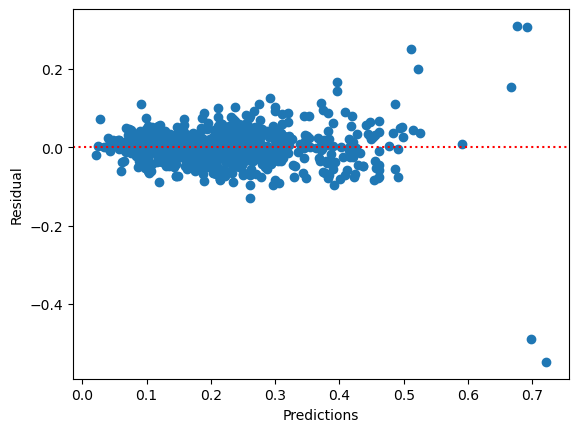

In [215]:
df_train1 = df_train
df_train1['res'] = y_res
plt.scatter( y_pred_train , df_train1['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

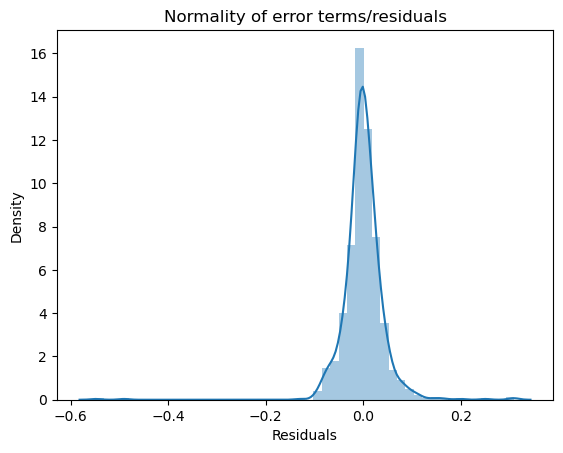

In [216]:
# Distribution of errors to check if it centered around 1 
p = sbs.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Predicting on test data

In [217]:
y_pred_test = lm_1.predict(X_test_rfe)
y_pred_test

array([ 0.1258475 ,  0.21908409,  0.18930798,  0.22414924,  0.06280691,
        0.35088939,  0.24535831,  0.33114128,  0.06821413,  0.20135416,
        0.20515499,  0.21934137,  0.17308979,  0.19411088,  0.10260803,
        0.15604938,  0.20020564,  0.09387481,  0.13936151,  0.11375651,
        0.16006084,  0.10821027,  0.1374436 ,  0.10524593,  0.21018651,
        0.11757028, -0.04538296,  0.09261441,  0.20350833,  0.15722944,
        0.14635388,  0.26039963,  0.26274731,  0.07195707,  0.14830961,
        0.03068657,  0.12229113,  0.10818161,  0.16194483,  0.1273736 ,
        0.46175642,  0.225485  ,  0.16537955,  0.09881722,  0.16860884,
        0.0655054 ,  0.25026275,  0.11144041,  0.14318065,  0.07236174,
        0.26358684,  0.08038224,  0.36795851,  0.25875786,  0.18720552,
        0.13433535,  0.02238075,  0.20644684,  0.1356525 ,  0.49323419,
        0.16046976,  0.24520764,  0.16767885,  0.20755944,  0.29685456,
        0.26775578,  0.10528119,  0.11076735,  0.23644594,  0.18

In [218]:
r2_test_lm1 = r2_score(y_test,y_pred_test)
print(r2_test_lm1)
metric.append(r2_test_lm1)

0.8273466731171112


In [219]:
rss_test_lm1 = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lm1)
metric.append(rss_test_lm1)

0.9408475209474015


In [220]:
mse_test = mean_squared_error(y_test,y_pred_test)
print(mse_test)
metric.append(mse_test)

0.002143160639971302


In [221]:
rmse_test = mse_test ** 0.5
print(rmse_test)
metric.append(rmse_test)

0.0462942830160626


In [222]:
## Determine adjusted R2 of test
n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1]
adj_r2_test_lm1 = 1-(1-r2_test_lm1)*(n-1)/(n-p-1)
print(adj_r2_test_lm1)
metric.append(adj_r2_test_lm1)

0.809994579963052


###### The model seems to have a lot of variables and we will see how this can be simplified using reglarization techniques

#### Model building  using Ridge regularization

In [223]:
#List of alphas to tune -if too high then underfitting 
params = {'alpha': [ 0.0001,0.001,0.01,0.05,0.1,
                     0.2,0.3,0.4,0.5,0.6,0.7,0.8,
                     0.9,1.0,2.0,3.0,4.0,5.0,6.0,
                     7.0,8.0,9.0,10.0,20,50,
                     100,500,1000]}


In [224]:
ridge = Ridge()

#Cross validation
folds = 5
model_cv = GridSearchCV(estimator= ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1 )
model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [225]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head(20)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.007356      0.007048         0.000000        0.000000      0.0001   
1        0.005490      0.005875         0.003798        0.003935       0.001   
2        0.003105      0.006210         0.007945        0.006889        0.01   
3        0.003155      0.006310         0.006286        0.007699        0.05   
4        0.002413      0.004826         0.003123        0.006246         0.1   
5        0.003126      0.006252         0.003560        0.007119         0.2   
6        0.000000      0.000000         0.003129        0.006258         0.3   
7        0.006217      0.007621         0.000000        0.000000         0.4   
8        0.006133      0.007513         0.003351        0.006165         0.5   
9        0.000332      0.000664         0.003125        0.006250         0.6   
10       0.006441      0.004995         0.002936        0.003063         0.7   
11       0.003210      0.004236         0.009381        0.007660         0.8   
12       0.009617      0.007861         0.003124        0.006248         0.9   
13       0.009144      0.007470         0.000000        0.000000         1.0   
14       0.012594      0.006353         0.000000        0.000000         2.0   
15       0.001404      0.002808         0.000000        0.000000         3.0   
16       0.009623      0.008046         0.002674        0.005349         4.0   
17       0.010083      0.006886         0.000237        0.000475         5.0   
18       0.005685      0.005799         0.003002        0.003344         6.0   
19       0.010096      0.006698         0.000154        0.000308         7.0   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.027448          -0.031040   
1    {'alpha': 0.001}          -0.027448          -0.031040   
2     {'alpha': 0.01}          -0.027444          -0.031032   
3     {'alpha': 0.05}          -0.027431          -0.031001   
4      {'alpha': 0.1}          -0.027419          -0.030966   
5      {'alpha': 0.2}          -0.027404          -0.030905   
6      {'alpha': 0.3}          -0.027397          -0.030855   
7      {'alpha': 0.4}          -0.027397          -0.030812   
8      {'alpha': 0.5}          -0.027401          -0.030782   
9      {'alpha': 0.6}          -0.027407          -0.030762   
10     {'alpha': 0.7}          -0.027422          -0.030753   
11     {'alpha': 0.8}          -0.027443          -0.030749   
12     {'alpha': 0.9}          -0.027465          -0.030751   
13     {'alpha': 1.0}          -0.027489          -0.030755   
14     {'alpha': 2.0}          -0.027756          -0.030961   
15     {'alpha': 3.0}          -0.028065          -0.031380   
16     {'alpha': 4.0}          -0.028326          -0.031875   
17     {'alpha': 5.0}          -0.028556          -0.032396   
18     {'alpha': 6.0}          -0.028757          -0.032906   
19     {'alpha': 7.0}          -0.028940          -0.033408   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.029516          -0.026256          -0.026924        -0.028237   
1           -0.029514          -0.026255          -0.026923        -0.028236   
2           -0.029497          -0.026244          -0.026915        -0.028226   
3           -0.029425          -0.026198          -0.026882        -0.028188   
4           -0.029345          -0.026147          -0.026848        -0.028145   
5           -0.029216          -0.026057          -0.026793        -0.028075   
6           -0.029114          -0.025995          -0.026749        -0.028022   
7           -0.029056          -0.025942          -0.026713        -0.027984   
8           -0.029016          -0.025896          -0.026688        -0.027957   
9           -0.028988          -0.025856          -0.026670        -0.027937   
10          -0.028978          -0.025822          -0.026662        -0.027927   
11          -0.028981          -0.02579

In [226]:
# Printing best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.8}


In [227]:
# Ftting Ridge model for alpha = 0.8 and print coefficients which are penalized
alpha = 0.8
ridge = Ridge(alpha= alpha)

ridge.fit(X_train_rfe,y_train)
print(ridge.coef_)

[ 0.11112696  0.01358954  0.02081307  0.05939958  0.15786885  0.06152091
 -0.01948586  0.15353552  0.04571525  0.0481455  -0.09495536  0.08328956
  0.03926909 -0.06370535  0.02317774 -0.07364251  0.04963269 -0.03743004
  0.06499657  0.12130013  0.12834248  0.05294994 -0.01156546  0.04203702
 -0.04189719 -0.01156546 -0.00167011 -0.05105694 -0.00167011 -0.00541217
  0.02854045  0.03447311 -0.05317819 -0.04832206 -0.03408301 -0.05472042
 -0.03408301 -0.00670476  0.00760529  0.00760529]


In [228]:
print(ridge.intercept_)

0.1000582407341688


In [229]:
# Calculate metrics
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

In [230]:
metric2 = []
r2_train_ridge = r2_score(y_train,y_pred_train)
print(r2_train_ridge)
metric2.append(r2_train_ridge)
rss_train_ridge = np.sum(np.square(y_train - y_pred_train))
print(rss_train_ridge)
metric2.append(rss_train_ridge)
mse_train_ridge = mean_squared_error(y_train,y_pred_train)
print(mse_train_ridge)
metric2.append(mse_train_ridge)
rmse_train_ridge = mse_train ** 0.5
print(rmse_train_ridge)
metric2.append(rmse_train_ridge)
## Determine adjusted R2 of train
n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1]
adj_r2_train_ridge = 1-(1-r2_train_ridge)*(n-1)/(n-p-1)
print(adj_r2_train_ridge)
metric2.append(adj_r2_train_ridge)

0.8373033319185463
2.0023503680014754
0.0019611658844284775
0.044136637602232326
0.820951907990762


#### Validating assumptions of Linear regression for Ridge

In [231]:
# Residual analysis
y_res = y_train - y_pred_train


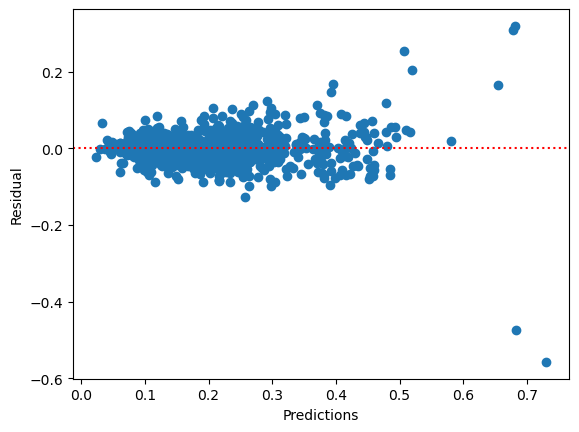

In [232]:
df_train1 = df_train
df_train1['res'] = y_res
plt.scatter( y_pred_train , df_train1['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

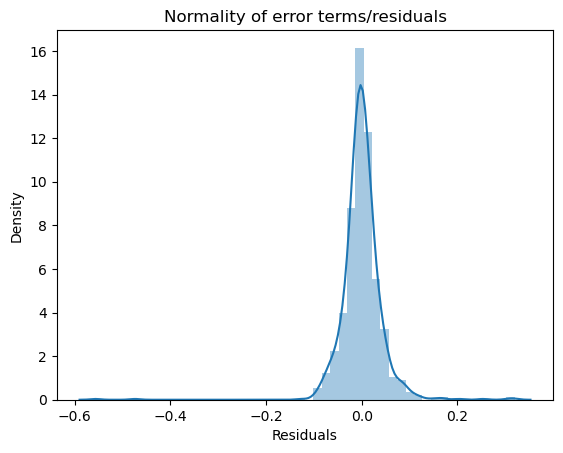

In [233]:
# Distribution of errors to check if it centered around 1 
p = sbs.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [234]:
r2_test_ridge = r2_score(y_test,y_pred_test)
print(r2_test_ridge)
metric2.append(r2_test_ridge)
rss_test_ridge = np.sum(np.square(y_test - y_pred_test))
print(rss_test_ridge)
metric2.append(rss_test_ridge)
mse_test_ridge = mean_squared_error(y_test,y_pred_test)
print(mse_test_ridge)
metric2.append(mse_test_ridge)
rmse_test_ridge = mse_test ** 0.5
print(rmse_test_ridge)
metric2.append(rmse_test_ridge)
## Determine adjusted R2 of test
n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1]
adj_r2_test_ridge = 1-(1-r2_test_ridge)*(n-1)/(n-p-1)
print(adj_r2_test_ridge)
metric2.append(adj_r2_test_ridge)

0.8289619273130625
0.9320454437827289
0.0021231103503023437
0.0462942830160626
0.811772171264124


In [235]:
# Get absolute values to determine the top 10 contributors
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Ridge'] = ridge.coef_

In [236]:
# Get the coefficient values
ridge_coeff_abs = betas['Ridge']
ridge_coeff_abs.sort_values(ascending=False)

1stFlrSF                      0.157869
GrLivArea                     0.153536
OverallQual_Very Excellent    0.128342
OverallQual_Excellent         0.121300
LotArea                       0.111127
GarageCars                    0.083290
Neighborhood_NoRidge          0.064997
2ndFlrSF                      0.061521
TotalBsmtSF                   0.059400
OverallQual_Very Good         0.052950
Neighborhood_Crawfor          0.049633
FullBath                      0.048145
BsmtFullBath                  0.045715
OverallCond_Excellent         0.042037
3SsnPorch                     0.039269
Foundation_Stone              0.034473
Exterior2nd_ImStucc           0.028540
MiscVal                       0.023178
BsmtFinSF2                    0.020813
BsmtFinSF1                    0.013590
GarageType_No Garage          0.007605
GarageFinish_No Garage        0.007605
Exterior1st_AsphShn          -0.001670
Exterior2nd_AsphShn          -0.001670
Exterior2nd_CBlock           -0.005412
KitchenQual_Fa           

In [237]:
# Get the top 10 contributors
ridge_coeff_abs = betas['Ridge'].abs()
ridge_coeff_abs.sort_values(ascending=False).head()

1stFlrSF                      0.157869
GrLivArea                     0.153536
OverallQual_Very Excellent    0.128342
OverallQual_Excellent         0.121300
LotArea                       0.111127
Name: Ridge, dtype: float64

### Equation of the model for Ridge 
####  Optimal value of alpha was determined as 0.8
#### SalePrice= 0.1000  + ( 1stFlrSF * 0.157869 ) + GrLivArea * 0.153536  + ( OverallQual_Very Excellent * 0.128342 ) + ( OverallQual_Excellent * 0.121300 ) + ( LotArea  * 0.111127 ) - ( KitchenAbvGr * 0.094955 ) + ( GarageCars * 0.083290 ) - ( Age * 0.073643 )  +   ( Neighborhood_NoRidge * 0.064997 ) - PoolArea * 0.063705

#### Summary stats:
#### R2 Score (Train) = 0.83730
#### R2 Score (Test) =0.82896
#### Adj R2 Score ( Test) = 0.8209
##### Adj R2 Score ( Train) = 0.8117

#### Top 3 contributors are :
##### 1. 1stFlrSF  with coefficient of 0.157869 where every one unit of 1stFlrSF increase there would increase in bike count by 0.157869 units when every other variable is held constant.,
##### 2. GrLivArea  with coefficient of 0.153536 where every one unit of GrLivArea  increase there would increase in bike count by 0.153536 units when every other variable is held constant.,
##### 3. OverallQual of category Very Excellent with coefficient of  0.134886 with respect to category 'Above Average' where every one unit increase of OverallQual category Very Excellent increases the bike count by 0.134886 units when every other variable is held constant.


## Building Ridge model with double the optimal alpha value 0f 0.8 which is 1.6

In [238]:
# Ftting Ridge model for alpha = 1.6 and print coefficients which are penalized
alpha = 1.6
ridge1 = Ridge(alpha= alpha)

ridge1.fit(X_train_rfe,y_train)
print(ridge1.coef_)


[ 0.09181485  0.02029672  0.02180925  0.06865948  0.14460981  0.06198352
 -0.01767092  0.14289197  0.04456238  0.05176972 -0.08866063  0.08463953
  0.03449468 -0.04672786  0.01636297 -0.07176637  0.0490895  -0.03560151
  0.06511176  0.11862077  0.12282338  0.0529515  -0.00844181  0.04050166
 -0.03993427 -0.00844181 -0.00088041 -0.03365777 -0.00088041 -0.00416475
  0.02332978  0.02797831 -0.05346587 -0.04887553 -0.03410511 -0.05565447
 -0.03410511 -0.00689928  0.0068382   0.0068382 ]


In [239]:
print(ridge1.intercept_)

0.10117260477183182


In [240]:
# Calculate metrics
y_pred_train = ridge1.predict(X_train_rfe)
y_pred_test = ridge1.predict(X_test_rfe)

In [241]:
metric4 = []
r2_train_ridge1 = r2_score(y_train,y_pred_train)
print(r2_train_ridge1)
metric4.append(r2_train_ridge1)
rss_train_ridge1 = np.sum(np.square(y_train - y_pred_train))
print(rss_train_ridge1)
metric4.append(rss_train_ridge1)
mse_train_ridge1 = mean_squared_error(y_train,y_pred_train)
print(mse_train_ridge1)
metric4.append(mse_train_ridge1)
rmse_train_ridge1 = mse_train_ridge1 ** 0.5
print(rmse_train_ridge1)
metric4.append(rmse_train_ridge1)
## Determine adjusted R2 of train
n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1]
adj_r2_train_ridge1 = 1-(1-r2_train_ridge1)*(n-1)/(n-p-1)
print(adj_r2_train_ridge1)
metric4.append(adj_r2_train_ridge1)

0.8356325802097075
2.0229127454519933
0.0019813053334495527
0.044511856099802814
0.8191132415373164


In [242]:
# Residual analysis
y_res = y_train - y_pred_train

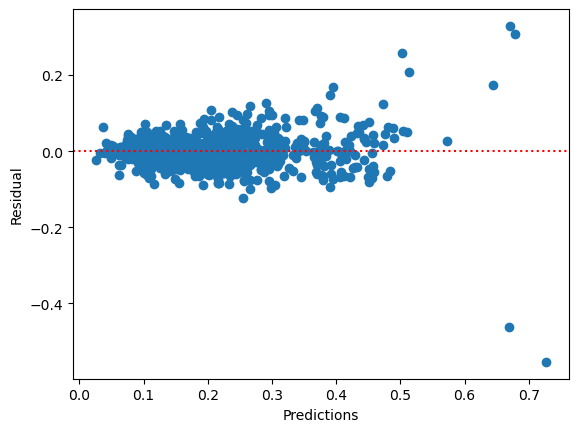

In [243]:
df_train1 = df_train
df_train1['res'] = y_res
plt.scatter( y_pred_train , df_train1['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

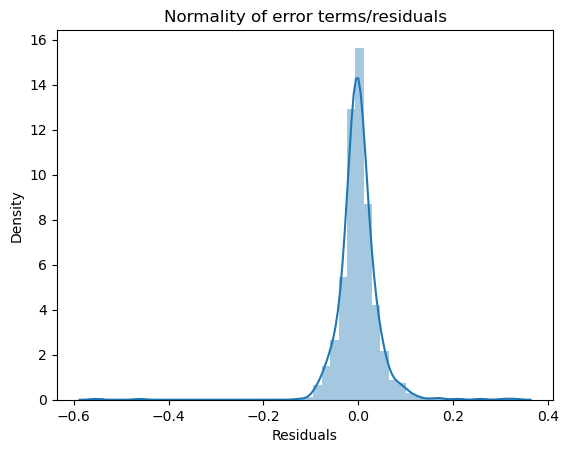

In [244]:
# Distribution of errors to check if it centered around 1 
p = sbs.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [245]:
r2_test_ridge1 = r2_score(y_test,y_pred_test)
print(r2_test_ridge1)
metric4.append(r2_test_ridge1)
rss_test_ridge1 = np.sum(np.square(y_test - y_pred_test))
print(rss_test_ridge1)
metric4.append(rss_test_ridge1)
mse_test_ridge1 = mean_squared_error(y_test,y_pred_test)
print(mse_test_ridge1)
metric4.append(mse_test_ridge1)
rmse_test_ridge1 = mse_test_ridge1 ** 0.5
print(rmse_test_ridge1)
metric4.append(rmse_test_ridge1)
## Determine adjusted R2 of test
n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1]
adj_r2_test_ridge1 = 1-(1-r2_test_ridge1)*(n-1)/(n-p-1)
print(adj_r2_test_ridge1)
metric4.append(adj_r2_test_ridge1)



0.8281252636253156
0.9366047127565456
0.0021334959288303998
0.04618978164952071
0.8108514207735885


In [246]:
# Get the coefficient values
betas['Ridge1'] = ridge1.coef_
ridge_coeff_abs1 = betas['Ridge1']
ridge_coeff_abs1.sort_values(ascending=False)

1stFlrSF                      0.144610
GrLivArea                     0.142892
OverallQual_Very Excellent    0.122823
OverallQual_Excellent         0.118621
LotArea                       0.091815
GarageCars                    0.084640
TotalBsmtSF                   0.068659
Neighborhood_NoRidge          0.065112
2ndFlrSF                      0.061984
OverallQual_Very Good         0.052951
FullBath                      0.051770
Neighborhood_Crawfor          0.049089
BsmtFullBath                  0.044562
OverallCond_Excellent         0.040502
3SsnPorch                     0.034495
Foundation_Stone              0.027978
Exterior2nd_ImStucc           0.023330
BsmtFinSF2                    0.021809
BsmtFinSF1                    0.020297
MiscVal                       0.016363
GarageType_No Garage          0.006838
GarageFinish_No Garage        0.006838
Exterior1st_AsphShn          -0.000880
Exterior2nd_AsphShn          -0.000880
Exterior2nd_CBlock           -0.004165
KitchenQual_Fa           

In [247]:
# Get absolute values to determine the top 10 contributors
ridge_coeff_abs1 = betas['Ridge1'].abs()
ridge_coeff_abs1.sort_values(ascending=False).head(10)

1stFlrSF                      0.144610
GrLivArea                     0.142892
OverallQual_Very Excellent    0.122823
OverallQual_Excellent         0.118621
LotArea                       0.091815
KitchenAbvGr                  0.088661
GarageCars                    0.084640
Age                           0.071766
TotalBsmtSF                   0.068659
Neighborhood_NoRidge          0.065112
Name: Ridge1, dtype: float64

#### Here when the alpha was doubled the top 10 contributors remains the same but their coefficients changes and the R2 , Adj. R2 value decreased when compared to the optimal alpha value

### Lasso Regression

In [248]:
lasso = Lasso()

#Cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator= lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1 )
model_cv_lasso.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [249]:
# creating dataframe with model_ridge results
lasso_results = pd.DataFrame(model_cv_lasso.cv_results_)
lasso_results.head(20)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.013394      0.004754         0.003709        0.005512      0.0001   
1        0.006852      0.007247         0.003129        0.006258       0.001   
2        0.009059      0.007485         0.003004        0.006009        0.01   
3        0.007766      0.007002         0.003125        0.006250        0.05   
4        0.006343      0.007770         0.003125        0.006250         0.1   
5        0.009372      0.007652         0.003125        0.006249         0.2   
6        0.004103      0.008206         0.000000        0.000000         0.3   
7        0.003094      0.002576         0.004406        0.005615         0.4   
8        0.003129      0.006258         0.006249        0.007653         0.5   
9        0.006496      0.007957         0.009190        0.007555         0.6   
10       0.003652      0.006248         0.005027        0.006453         0.7   
11       0.009381      0.007660         0.005536        0.006877         0.8   
12       0.000000      0.000000         0.012595        0.006354         0.9   
13       0.012182      0.006123         0.003529        0.007058         1.0   
14       0.011103      0.003865         0.001575        0.001643         2.0   
15       0.004598      0.006305         0.000799        0.001598         3.0   
16       0.009127      0.007462         0.006542        0.008025         4.0   
17       0.005131      0.006531         0.003130        0.006260         5.0   
18       0.009375      0.007655         0.003125        0.006249         6.0   
19       0.007055      0.007155         0.003126        0.006252         7.0   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.027281          -0.030617   
1    {'alpha': 0.001}          -0.029655          -0.034845   
2     {'alpha': 0.01}          -0.065471          -0.070007   
3     {'alpha': 0.05}          -0.080067          -0.083171   
4      {'alpha': 0.1}          -0.080067          -0.083171   
5      {'alpha': 0.2}          -0.080067          -0.083171   
6      {'alpha': 0.3}          -0.080067          -0.083171   
7      {'alpha': 0.4}          -0.080067          -0.083171   
8      {'alpha': 0.5}          -0.080067          -0.083171   
9      {'alpha': 0.6}          -0.080067          -0.083171   
10     {'alpha': 0.7}          -0.080067          -0.083171   
11     {'alpha': 0.8}          -0.080067          -0.083171   
12     {'alpha': 0.9}          -0.080067          -0.083171   
13     {'alpha': 1.0}          -0.080067          -0.083171   
14     {'alpha': 2.0}          -0.080067          -0.083171   
15     {'alpha': 3.0}          -0.080067          -0.083171   
16     {'alpha': 4.0}          -0.080067          -0.083171   
17     {'alpha': 5.0}          -0.080067          -0.083171   
18     {'alpha': 6.0}          -0.080067          -0.083171   
19     {'alpha': 7.0}          -0.080067          -0.083171   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.029101          -0.025557          -0.026657        -0.027842   
1           -0.033440          -0.030454          -0.030806        -0.031840   
2           -0.065487          -0.060847          -0.068633        -0.066089   
3           -0.077650          -0.075051          -0.084132        -0.080014   
4           -0.077650          -0.075051          -0.084132        -0.080014   
5           -0.077650          -0.075051          -0.084132        -0.080014   
6           -0.077650          -0.075051          -0.084132        -0.080014   
7           -0.077650          -0.075051          -0.084132        -0.080014   
8           -0.077650          -0.075051          -0.084132        -0.080014   
9           -0.077650          -0.075051          -0.084132        -0.080014   
10          -0.077650          -0.075051          -0.084132        -0.080014   
11          -0.077650          -0.07505

In [250]:
# Printing best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.0001}


In [251]:
# Ftting Ridge model for alpha = 0.0001 and print coefficients which are penalized
alpha =  0.0001
lasso = Lasso(alpha= alpha)

In [252]:
lasso.fit(X_train_rfe,y_train)
print(lasso.coef_)

[ 0.10937298  0.          0.01066737  0.0003179   0.07700688  0.
 -0.024836    0.31478315  0.04780841  0.04215594 -0.09202852  0.08029221
  0.02134501 -0.03808109  0.         -0.07945655  0.04724441 -0.02810674
  0.06158215  0.12493234  0.13488622  0.05357774 -0.          0.03464045
 -0.03649651 -0.         -0.         -0.         -0.         -0.
  0.0101471   0.00599475 -0.04645089 -0.04318613 -0.05689458 -0.04937544
 -0.0145516  -0.00247945  0.00974503  0.        ]


In [253]:
print(lasso.intercept_)

0.10493278757332718


In [254]:
# Calculate metrics
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lasso = r2_score(y_train,y_pred_train)
print(r2_train_lasso)
metric3.append(r2_train_lasso)
rss_train_lasso = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lasso)
metric3.append(rss_train_lasso)
mse_train_lasso = mean_squared_error(y_train,y_pred_train)
print(mse_train_lasso)
metric3.append(mse_train_lasso)
rmse_train_lasso = mse_train ** 0.5
print(rmse_train_lasso)
metric3.append(rmse_train_lasso)
## Determine adjusted R2 of test
n = X_train_rfe.shape[0]
p = X_train_rfe.shape[1]
adj_r2_train_lasso = 1-(1-r2_train_lasso)*(n-1)/(n-p-1)
print(adj_r2_train_lasso)
metric3.append(adj_r2_train_lasso)

0.8351540612953754
2.0288020026537987
0.0019870734599939264
0.044136637602232326
0.8284256556339622


#### Validating assumptions for linear regression using Lasso

In [255]:
# Residual analysis
y_res = y_train - y_pred_train

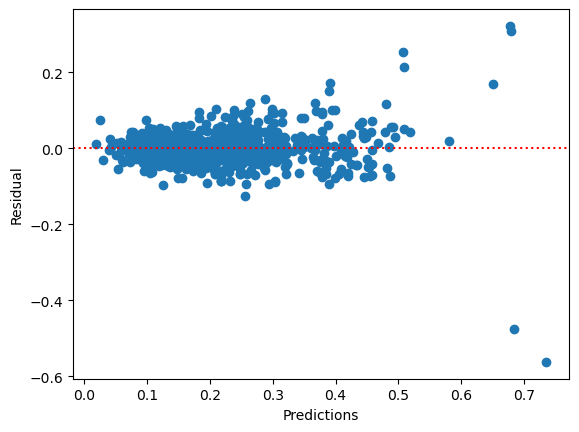

In [256]:
df_train1 = df_train
df_train1['res'] = y_res
plt.scatter( y_pred_train , df_train1['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

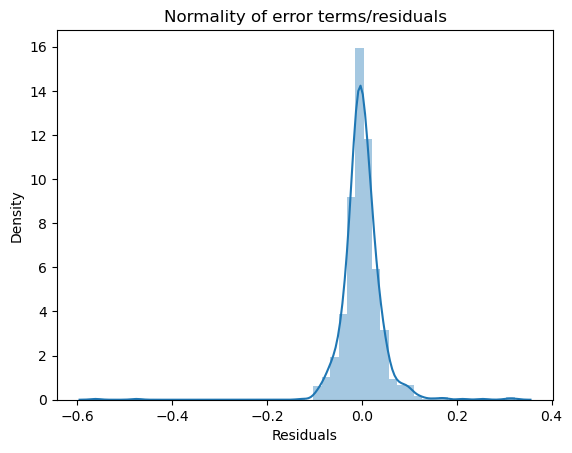

In [257]:
# Distribution of errors to check if it centered around 1 
p = sbs.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [258]:
r2_test_lasso = r2_score(y_test,y_pred_test)
print(r2_test_lasso)
metric3.append(r2_test_lasso)
rss_test_lasso = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lasso)
metric3.append(rss_test_lasso)
mse_test_lasso = mean_squared_error(y_test,y_pred_test)
print(mse_test_lasso)
metric3.append(mse_test_lasso)
rmse_test_lasso = mse_test ** 0.5
print(rmse_test_lasso)
metric3.append(rmse_test_lasso)



0.8330310158023952
0.9098715773022925
0.0020726004038776596
0.0462942830160626


In [259]:
## Determine adjusted R2 of test
n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1]
adj_r2_test_lasso = 1-(1-r2_test_lasso)*(n-1)/(n-p-1)
print(adj_r2_test_lasso)
metric3.append(adj_r2_test_lasso)

0.8162502133704752


In [260]:
# Get the coefficient values
betas['Lasso'] = lasso.coef_
Lasso_coeff_abs = betas['Lasso']
Lasso_coeff_abs.sort_values(ascending=False)

GrLivArea                     0.314783
OverallQual_Very Excellent    0.134886
OverallQual_Excellent         0.124932
LotArea                       0.109373
GarageCars                    0.080292
1stFlrSF                      0.077007
Neighborhood_NoRidge          0.061582
OverallQual_Very Good         0.053578
BsmtFullBath                  0.047808
Neighborhood_Crawfor          0.047244
FullBath                      0.042156
OverallCond_Excellent         0.034640
3SsnPorch                     0.021345
BsmtFinSF2                    0.010667
Exterior2nd_ImStucc           0.010147
GarageType_No Garage          0.009745
Foundation_Stone              0.005995
TotalBsmtSF                   0.000318
Exterior2nd_AsphShn          -0.000000
Exterior2nd_CBlock           -0.000000
Exterior1st_ImStucc          -0.000000
Exterior1st_AsphShn          -0.000000
OverallCond_Very Poor        -0.000000
OverallQual_Very Poor        -0.000000
2ndFlrSF                      0.000000
BsmtFinSF1               

In [261]:
# Get absolute values to determine the top 10 contributors
Lasso_coeff_abs = betas['Lasso'].abs()
Lasso_coeff_abs.sort_values(ascending=False).head(10)

GrLivArea                     0.314783
OverallQual_Very Excellent    0.134886
OverallQual_Excellent         0.124932
LotArea                       0.109373
KitchenAbvGr                  0.092029
GarageCars                    0.080292
Age                           0.079457
1stFlrSF                      0.077007
Neighborhood_NoRidge          0.061582
BsmtQual_No Basement          0.056895
Name: Lasso, dtype: float64

### Equation of the model for lasso
#### Optimal value of alpha was determined to be 0.0001
#### SalePrice= 0.1049  + ( GrLivArea * 0.314783 ) + ( OverallQual_Very Excellent * 0.134886) + ( OverallQual_Excellent * 0.124932 ) + ( LotArea  * 0.109373 ) - ( KitchenAbvGr * 0.092029 ) + ( GarageCars * 0.080292 ) - ( Age * 0.079457 )  + 1stFlrSF * 0.077007   + ( Neighborhood_NoRidge * 0.06158 ) - BsmtQual_No Basement * 0.056895

#### Summary stats:
#### R2 Score (Train) = 0.837303
#### R2 Score (Test) = 0.833031
#### Adj R2 Score ( Test) = 0.8284
##### Adj R2 Score ( Train) = 0.8162

#### Top 3 contributors are :
#### 1. GrLivArea  with coefficient of 0.314783 where every one unit of GrLivArea  increase there would increase in bike count by #### 0.314783 units when every other variable is held constant.,
##### 2. OverallQual of category Very Excellent with coefficient of  0.134886 with respect to category 'Above Average' where every one unit increase of OverallQual category Very Excellent increases the bike count by 0.134886 units when every other variable is held constant.
#### 3. OverallQual of category Excellent with coefficient of 0.124932 with respect to category 'Above Average' where every one unit increase of OverallQual category Excellent increases the bike count by 0.124932 units when every other variable is held constant.

### Bulding lasso model with double the alpha value of 0.0001 which is 0.0002


In [262]:
# Ftting Ridge model for alpha = 0.0002 and print coefficients which are penalized
alpha =  0.0002
lasso1 = Lasso(alpha= alpha)

In [263]:
lasso1.fit(X_train_rfe,y_train)
print(lasso1.coef_)

[ 0.07115404  0.          0.00303402  0.          0.07932185  0.
 -0.01253044  0.30951002  0.04783125  0.04210104 -0.0844478   0.07993802
  0.         -0.          0.         -0.08062089  0.0451049  -0.01667523
  0.05984837  0.12517869  0.13185808  0.05400639 -0.          0.02714062
 -0.02968402 -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.03887519 -0.03843951 -0.05226134 -0.04473741
 -0.01336894 -0.          0.00364475  0.        ]


In [264]:

print(lasso1.intercept_)

0.10369503404510622


In [265]:
# Calculate metrics
y_pred_train = lasso1.predict(X_train_rfe)
y_pred_test = lasso1.predict(X_test_rfe)

In [266]:
metric5 = []
r2_train_lasso1 = r2_score(y_train,y_pred_train)
print(r2_train_lasso1)
metric5.append(r2_train_lasso1)
rss_train_lasso1 = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lasso1)
metric5.append(rss_train_lasso1)
mse_train_lasso1 = mean_squared_error(y_train,y_pred_train)
print(mse_train_lasso1)
metric5.append(mse_train_lasso1)
rmse_train_lasso1 = mse_train_lasso1 ** 0.5
print(rmse_train_ridge1)
metric5.append(rmse_train_ridge1)
## Determine adjusted R2 of test
n = X_train_rfe.shape[0]
p = X_train_rfe.shape[1]
adj_r2_train_lasso1 = 1-(1-r2_train_lasso1)*(n-1)/(n-p-1)
print(adj_r2_train_lasso1)
metric5.append(adj_r2_train_lasso1)


0.8301786212881244
2.090036041721525
0.002047048033027938
0.044511856099802814
0.8232471364427416


In [267]:
# Residual analysis
y_res = y_train - y_pred_train

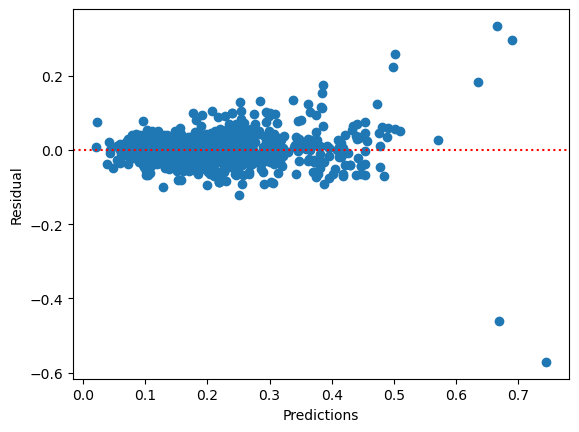

In [268]:
df_train1 = df_train
df_train1['res'] = y_res
plt.scatter( y_pred_train , df_train1['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

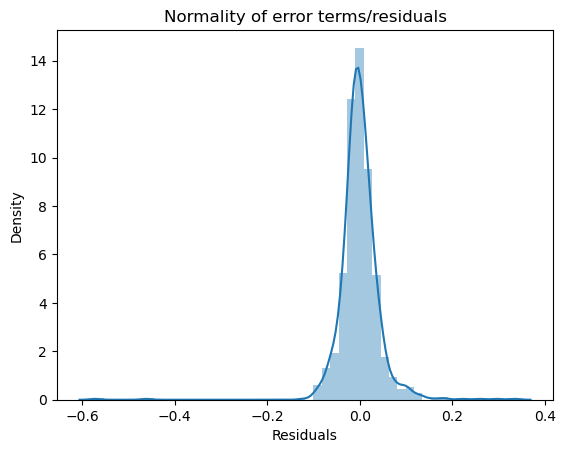

In [269]:
# Distribution of errors to check if it centered around 1 
p = sbs.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [270]:
r2_test_lasso1 = r2_score(y_test,y_pred_test)
print(r2_test_lasso1)
metric5.append(r2_test_lasso1)
rss_test_lasso1 = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lasso1)
metric5.append(rss_test_lasso1)
mse_test_lasso1 = mean_squared_error(y_test,y_pred_test)
print(mse_test_lasso1)
metric5.append(mse_test_lasso1)
rmse_test_lasso1 = mse_test ** 0.5
print(rmse_test_lasso1)
metric5.append(rmse_test_lasso1)


0.8315263951751769
0.9180707739968624
0.002091277389514493
0.0462942830160626


In [271]:

## Determine adjusted R2 of test
n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1]
adj_r2_test_lasso1 = 1-(1-r2_test_lasso1)*(n-1)/(n-p-1)
print(adj_r2_test_lasso1)
metric5.append(adj_r2_test_lasso1)

0.8145943745897676


In [272]:
# Get the coefficient values
betas['Lasso1'] = lasso1.coef_
Lasso_coeff_abs1 = betas['Lasso1']
Lasso_coeff_abs1.sort_values(ascending=False)

GrLivArea                     0.309510
OverallQual_Very Excellent    0.131858
OverallQual_Excellent         0.125179
GarageCars                    0.079938
1stFlrSF                      0.079322
LotArea                       0.071154
Neighborhood_NoRidge          0.059848
OverallQual_Very Good         0.054006
BsmtFullBath                  0.047831
Neighborhood_Crawfor          0.045105
FullBath                      0.042101
OverallCond_Excellent         0.027141
GarageType_No Garage          0.003645
BsmtFinSF2                    0.003034
Exterior1st_AsphShn          -0.000000
Exterior1st_ImStucc          -0.000000
Exterior2nd_CBlock           -0.000000
Exterior2nd_AsphShn          -0.000000
2ndFlrSF                      0.000000
Exterior2nd_ImStucc           0.000000
Foundation_Stone              0.000000
KitchenQual_Fa               -0.000000
OverallCond_Very Poor        -0.000000
GarageFinish_No Garage        0.000000
OverallQual_Very Poor        -0.000000
BsmtFinSF1               

In [273]:
# Get absolute values to determine the top 10 contributors
Lasso_coeff_abs1 = betas['Lasso1'].abs()
Lasso_coeff_abs1.sort_values(ascending=False).head(10)

GrLivArea                     0.309510
OverallQual_Very Excellent    0.131858
OverallQual_Excellent         0.125179
KitchenAbvGr                  0.084448
Age                           0.080621
GarageCars                    0.079938
1stFlrSF                      0.079322
LotArea                       0.071154
Neighborhood_NoRidge          0.059848
OverallQual_Very Good         0.054006
Name: Lasso1, dtype: float64

##### When the alpha value was doubled from 0.0001 to 0.0002 the top10 contribtors changes and the value of R2 and Adj R2 for test decreased

#### Comparision of  models

In [274]:
#  Creating table which contains all metrics
lr_table = {'Metric':['R2 Score (Train)','RSS (Train)','MSE (Train)','RMSE (Train)','Adj R2 (Train)','R2 Score (Test)','RSS (Test)','MSE (Test)','RMSE (Test)','Adj R2 (Test)'],
                    'LinearRegression': metric}

lr_metric = pd.DataFrame(lr_table,columns = ['Metric','LinearRegression'])


In [275]:
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
# With double alpha
rg_metric1 = pd.Series(metric4, name = 'Ridge Regression_1')
ls_metric1 = pd.Series(metric5, name = 'Lasso Regression_1') ""

In [276]:
final_metric = pd.concat([lr_metric,rg_metric,ls_metric,rg_metric1,ls_metric1 ],axis = 1)

final_metric

Metric  LinearRegression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)          0.838392          0.837303          0.835154   
1       RSS (Train)          1.988952          2.002350          2.028802   
2       MSE (Train)          0.001948          0.001961          0.001987   
3      RMSE (Train)          0.044137          0.044137          0.044137   
4    Adj R2 (Train)          0.831796          0.820952          0.828426   
5   R2 Score (Test)          0.827347          0.828962          0.833031   
6        RSS (Test)          0.940848          0.932045          0.909872   
7        MSE (Test)          0.002143          0.002123          0.002073   
8       RMSE (Test)          0.046294          0.046294          0.046294   
9     Adj R2 (Test)          0.809995          0.811772          0.816250   

   Ridge Regression_1  Lasso Regression_1  
0            0.835633            0.830179  
1            2.022913            2.090036  
2            0.001981            0.002047  
3            0.044512            0.044512  
4            0.819113            0.823247  
5            0.828125            0.831526  
6            0.936605            0.918071  
7            0.002133            0.002091  
8            0.046190            0.046294  
9            0.810851            0.814594

### Here the model on Lasso has higher R2  and adj. R2 score on test  when compared to the other models and is also simpler since it has lesser features and is a better model

#### Model coefficients comparision for lasso and ridge using regularization on optimized alphas

In [277]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [278]:
betas.rows = X_train_rfe.columns

In [279]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [280]:
pd.set_option('display.max_rows',None)
betas.head(200)

Ridge     Lasso
LotArea                     0.111127  0.109373
BsmtFinSF1                  0.013590  0.000000
BsmtFinSF2                  0.020813  0.010667
TotalBsmtSF                 0.059400  0.000318
1stFlrSF                    0.157869  0.077007
2ndFlrSF                    0.061521  0.000000
LowQualFinSF               -0.019486 -0.024836
GrLivArea                   0.153536  0.314783
BsmtFullBath                0.045715  0.047808
FullBath                    0.048145  0.042156
KitchenAbvGr               -0.094955 -0.092029
GarageCars                  0.083290  0.080292
3SsnPorch                   0.039269  0.021345
PoolArea                   -0.063705 -0.038081
MiscVal                     0.023178  0.000000
Age                        -0.073643 -0.079457
Neighborhood_Crawfor        0.049633  0.047244
Neighborhood_MeadowV       -0.037430 -0.028107
Neighborhood_NoRidge        0.064997  0.061582
OverallQual_Excellent       0.121300  0.124932
OverallQual_Very Excellent  0.128342  0.134886
OverallQual_Very Good       0.052950  0.053578
OverallQual_Very Poor      -0.011565 -0.000000
OverallCond_Excellent       0.042037  0.034640
OverallCond_Fair           -0.041897 -0.036497
OverallCond_Very Poor      -0.011565 -0.000000
Exterior1st_AsphShn        -0.001670 -0.000000
Exterior1st_ImStucc        -0.051057 -0.000000
Exterior2nd_AsphShn        -0.001670 -0.000000
Exterior2nd_CBlock         -0.005412 -0.000000
Exterior2nd_ImStucc         0.028540  0.010147
Foundation_Stone            0.034473  0.005995
BsmtQual_Fa                -0.053178 -0.046451
BsmtQual_Gd                -0.048322 -0.043186
BsmtQual_No Basement       -0.034083 -0.056895
BsmtQual_TA                -0.054720 -0.049375
BsmtFinType1_No Basement   -0.034083 -0.014552
KitchenQual_Fa             -0.006705 -0.002479
GarageType_No Garage        0.007605  0.009745
GarageFinish_No Garage      0.007605  0.000000

### Bulding lasso model after dropping 5 top predictors

In [281]:
# Creating X_test dataframe with RFE selected variables
col1 = col
col2 = col1.drop(['GrLivArea','OverallQual_Very Excellent','OverallQual_Excellent','KitchenAbvGr','Age'])

In [282]:
col2

Index(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'FullBath', 'GarageCars',
       '3SsnPorch', 'PoolArea', 'MiscVal', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'OverallQual_Very Good',
       'OverallQual_Very Poor', 'OverallCond_Excellent', 'OverallCond_Fair',
       'OverallCond_Very Poor', 'Exterior1st_AsphShn', 'Exterior1st_ImStucc',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc',
       'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtFinType1_No Basement',
       'KitchenQual_Fa', 'GarageType_No Garage', 'GarageFinish_No Garage'],
      dtype='object')

In [283]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train[col2]
X_test_rfe2 = X_test[col2]
X_train_rfe2.head()

LotArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
318   0.039403    0.174876    0.000000     0.220458  0.231481  0.616949   
239   0.033981    0.016655    0.000000     0.120295  0.098611  0.333656   
986   0.017931    0.000000    0.000000     0.079378  0.145602  0.307022   
1416  0.046139    0.000000    0.000000     0.127169  0.202315  0.505569   
390   0.032409    0.042700    0.265265     0.140917  0.136343  0.196610   

      LowQualFinSF  BsmtFullBath  FullBath  GarageCars  3SsnPorch  PoolArea  \
318            0.0      0.333333  0.666667        0.75        0.0       0.0   
239            0.0      0.000000  0.333333        0.25        0.0       0.0   
986            0.0      0.000000  0.333333        0.25        0.0       0.0   
1416           0.0      0.000000  0.666667        0.50        0.0       0.0   
390            0.0      0.333333  0.333333        0.25        0.0       0.0   

      MiscVal  Neighborhood_Crawfor  Neighborhood_MeadowV  \
318       0.0                     0                     0   
239       0.0                     0                     0   
986       0.0                     0                     0   
1416      0.0                     0                     0   
390       0.0                     0                     0   

      Neighborhood_NoRidge  OverallQual_Very Good  OverallQual_Very Poor  \
318                      1                      0                      0   
239                      0                      0                      0   
986                      0                      0                      0   
1416                     0                      0                      0   
390                      0                      0                      0   

      OverallCond_Excellent  OverallCond_Fair  OverallCond_Very Poor  \
318                       0                 0                      0   
239                       0                 0                      0   
986                       0                 0                      0   
1416                      0                 0                      0   
390                       0                 0                      0   

      Exterior1st_AsphShn  Exterior1st_ImStucc  Exterior2nd_AsphShn  \
318                     0                    0                    0   
239                     0                    0                    0   
986                     0                    0                    0   
1416                    0                    0                    0   
390                     0                    0                    0   

      Exterior2nd_CBlock  Exterior2nd_ImStucc  Foundation_Stone  BsmtQual_Fa  \
318                    0                    0                 0            0   
239                    0                    0                 0            0   
986                    0                    0                 0            0   
1416                   0                    0                 0            0   
390                    0                    0                 0            0   

      BsmtQual_Gd  BsmtQual_No Basement  BsmtQual_TA  \
318             1                     0            0   
239             0                     0            1   
986             0                     0            1   
1416            0                     0            1   
390             0                     0            1   

      BsmtFinType1_No Basement  KitchenQual_Fa  GarageType_No Garage  \
318                          0               0                     0   
239                          0               0                     0   
986                          0               0                     0   
1416                         0               0                     0   
390                          0               0                     0   

      GarageFinish_No Garage  
318                        0  
239                        0  
986                        0  
1416                  

In [284]:
lasso = Lasso()

In [285]:
#Cross validation
folds = 5
model_cv_lasso2 = GridSearchCV(estimator= lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1 )
model_cv_lasso2.fit(X_train_rfe2,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [286]:
# creating dataframe with model_ridge results
lasso_results2 = pd.DataFrame(model_cv_lasso2.cv_results_)
lasso_results2.head(20)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.009804      0.005328         0.010184        0.003368      0.0001   
1        0.009693      0.003695         0.004279        0.001456       0.001   
2        0.009736      0.003027         0.005728        0.001012        0.01   
3        0.009384      0.003491         0.005082        0.000761        0.05   
4        0.008608      0.007377         0.001903        0.002460         0.1   
5        0.009601      0.007849         0.005231        0.006609         0.2   
6        0.003068      0.002365         0.002920        0.003140         0.3   
7        0.005241      0.004481         0.008596        0.006287         0.4   
8        0.008113      0.006953         0.008060        0.003325         0.5   
9        0.012934      0.005743         0.006324        0.001414         0.6   
10       0.010282      0.001689         0.004873        0.000798         0.7   
11       0.008538      0.000491         0.005402        0.001211         0.8   
12       0.014555      0.011989         0.005175        0.001257         0.9   
13       0.008154      0.003312         0.005421        0.002744         1.0   
14       0.010205      0.002457         0.002948        0.002073         2.0   
15       0.011245      0.006061         0.000795        0.001590         3.0   
16       0.011887      0.004026         0.008045        0.006646         4.0   
17       0.009864      0.002721         0.006131        0.000507         5.0   
18       0.014073      0.015260         0.006307        0.003341         6.0   
19       0.009455      0.006389         0.003212        0.006424         7.0   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.032399          -0.037185   
1    {'alpha': 0.001}          -0.034004          -0.040046   
2     {'alpha': 0.01}          -0.065471          -0.070007   
3     {'alpha': 0.05}          -0.080067          -0.083171   
4      {'alpha': 0.1}          -0.080067          -0.083171   
5      {'alpha': 0.2}          -0.080067          -0.083171   
6      {'alpha': 0.3}          -0.080067          -0.083171   
7      {'alpha': 0.4}          -0.080067          -0.083171   
8      {'alpha': 0.5}          -0.080067          -0.083171   
9      {'alpha': 0.6}          -0.080067          -0.083171   
10     {'alpha': 0.7}          -0.080067          -0.083171   
11     {'alpha': 0.8}          -0.080067          -0.083171   
12     {'alpha': 0.9}          -0.080067          -0.083171   
13     {'alpha': 1.0}          -0.080067          -0.083171   
14     {'alpha': 2.0}          -0.080067          -0.083171   
15     {'alpha': 3.0}          -0.080067          -0.083171   
16     {'alpha': 4.0}          -0.080067          -0.083171   
17     {'alpha': 5.0}          -0.080067          -0.083171   
18     {'alpha': 6.0}          -0.080067          -0.083171   
19     {'alpha': 7.0}          -0.080067          -0.083171   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.034190          -0.029560          -0.031347        -0.032936   
1           -0.037476          -0.031800          -0.035910        -0.035847   
2           -0.065487          -0.060847          -0.068633        -0.066089   
3           -0.077650          -0.075051          -0.084132        -0.080014   
4           -0.077650          -0.075051          -0.084132        -0.080014   
5           -0.077650          -0.075051          -0.084132        -0.080014   
6           -0.077650          -0.075051          -0.084132        -0.080014   
7           -0.077650          -0.075051          -0.084132        -0.080014   
8           -0.077650          -0.075051          -0.084132        -0.080014   
9           -0.077650          -0.075051          -0.084132        -0.080014   
10          -0.077650          -0.075051          -0.084132        -0.080014   
11          -0.077650          -0.07505

In [287]:
# Printing best hyperparameter alpha
print(model_cv_lasso2.best_params_)

{'alpha': 0.0001}


In [288]:
# Ftting Ridge model for alpha = 0.0001 and print coefficients which are penalized
alpha =  0.0001
lasso2 = Lasso(alpha= alpha)

In [289]:
lasso2.fit(X_train_rfe2,y_train)
print(lasso2.coef_)

[ 0.0923626   0.01089483  0.00695356  0.13479006  0.29852035  0.12282041
 -0.01141556  0.04160108  0.04267106  0.10547591  0.01698524 -0.0154079
  0.          0.03194756 -0.02121339  0.07247458  0.0345718  -0.
  0.03734596 -0.03897351 -0.         -0.         -0.         -0.
 -0.          0.01721587  0.         -0.13623474 -0.09334845 -0.10231035
 -0.12203885 -0.038287   -0.01089918  0.00717094  0.        ]


In [290]:
print(lasso2.intercept_)

0.11625869416294898


In [291]:
# Get the predictor and the coefficient values
betas1 = pd.DataFrame(index=X_train_rfe2.columns)
betas1.rows = X_train_rfe2.columns
betas1['Lasso2'] = lasso2.coef_
Lasso_coeff_abs2 = betas1['Lasso2']
Lasso_coeff_abs2.sort_values(ascending=False)

1stFlrSF                    0.298520
TotalBsmtSF                 0.134790
2ndFlrSF                    0.122820
GarageCars                  0.105476
LotArea                     0.092363
Neighborhood_NoRidge        0.072475
FullBath                    0.042671
BsmtFullBath                0.041601
OverallCond_Excellent       0.037346
OverallQual_Very Good       0.034572
Neighborhood_Crawfor        0.031948
Exterior2nd_ImStucc         0.017216
3SsnPorch                   0.016985
BsmtFinSF1                  0.010895
GarageType_No Garage        0.007171
BsmtFinSF2                  0.006954
Foundation_Stone            0.000000
Exterior2nd_CBlock         -0.000000
Exterior1st_AsphShn        -0.000000
Exterior2nd_AsphShn        -0.000000
Exterior1st_ImStucc        -0.000000
OverallQual_Very Poor      -0.000000
OverallCond_Very Poor      -0.000000
MiscVal                     0.000000
GarageFinish_No Garage      0.000000
KitchenQual_Fa             -0.010899
LowQualFinSF               -0.011416
P

In [292]:
# Get top 10
Lasso_coeff_abs2 = betas1['Lasso2'].abs()
Lasso_coeff_abs2.sort_values(ascending=False).head(10)

1stFlrSF                0.298520
BsmtQual_Fa             0.136235
TotalBsmtSF             0.134790
2ndFlrSF                0.122820
BsmtQual_TA             0.122039
GarageCars              0.105476
BsmtQual_No Basement    0.102310
BsmtQual_Gd             0.093348
LotArea                 0.092363
Neighborhood_NoRidge    0.072475
Name: Lasso2, dtype: float64

In [293]:
# Calculate metrics
y_pred_train = lasso2.predict(X_train_rfe2)
y_pred_test = lasso2.predict(X_test_rfe2)


In [294]:
r2_train_lasso2 = r2_score(y_train,y_pred_train)
print(r2_train_lasso2)
rss_train_lasso2 = np.sum(np.square(y_train - y_pred_train))
print(rss_train_lasso2)
mse_train_lasso2 = mean_squared_error(y_train,y_pred_train)
print(mse_train_lasso2)
rmse_train_lasso2 = mse_train_lasso2 ** 0.5
print(rmse_train_ridge1)
## Determine adjusted R2 of test
n = X_train_rfe2.shape[0]
p = X_train_rfe2.shape[1]
adj_r2_train_lasso2 = 1-(1-r2_train_lasso2)*(n-1)/(n-p-1)
print(adj_r2_train_lasso2)


0.7855499905458503
2.6392922511077876
0.0025850071019664915
0.044511856099802814
0.7779299394484946


In [295]:
r2_test_lasso2 = r2_score(y_test,y_pred_test)
print(r2_test_lasso2)
rss_test_lasso2 = np.sum(np.square(y_test - y_pred_test))
print(rss_test_lasso2)
mse_test_lasso2 = mean_squared_error(y_test,y_pred_test)
print(mse_test_lasso2)
rmse_test_lasso2 = mse_test ** 0.5
print(rmse_test_lasso2)

## Determine adjusted R2 of test
n = X_test_rfe2.shape[0]
p = X_test_rfe2.shape[1]
adj_r2_test_lasso2 = 1-(1-r2_test_lasso2)*(n-1)/(n-p-1)
print(adj_r2_test_lasso2)

0.7769478035209761
1.2154883423793486
0.002768766155761614
0.0462942830160626
0.7575760246704406


#### Here the R2,Adj R2 has dropped for both train and test set

##### The five most important predictors are changed to 1stFlrSF, BsmtQual_Fa,TotalBsmtSF ,2ndFlrSF,BsmtQual_TA             